<a href="https://colab.research.google.com/github/pariscwang/spotify-eda/blob/main/Spotify_Most_Streamed_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please refer to the README file & API documentation for information regarding the program.

#PART 1: DATA CLEANING

## Set Up Dataframe

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# read data from google drive
df = pd.read_csv('/content/drive/MyDrive/spotify-2023.csv', encoding='iso-8859-1')
df.head()

Mounted at /content/drive


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Our dataset contains 953 entries and 24 features (categorical and numerical). There are some missing values for some columns.

There are some discrepencies regarding data types for certain columns. For
example, **'streams', 'in_shazam_charts' and 'in_deezer_playlists'** should be considered numerical values instead of object.

Next, we will transform the data types for both columns and investigate missing values.

## Convert Data Types

In [4]:
# convert 'streams', 'in_shazam_charts' and 'in_deezer_playlists' to numeric values
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'].str.replace(',', ''), errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'].str.replace(',', ''), errors='coerce')

In [5]:
# check data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

## Check Missing Values


In [6]:
# we are checking for na values to see if there are anomalies
empty_cells = df.isna().sum()
print(empty_cells)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


As we can see, streams column has one missing value.

In [7]:
# check the row with missing streams
missing_streams_rows = df[df['streams'].isnull()]
missing_streams_rows

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,...,110,A,Major,53,75,69,7,0,17,3


In [8]:
# since it is only one row in our dataset, let's delete this row
df.dropna(subset=['streams'], inplace=True)

# check for empty values again
empty_cells = df.isna().sum()
print(empty_cells)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [9]:
# Get an overview of steams distribution for data points with missing values
# so we can decide best practices to deal with missing values

# Get rows with missing values in the 'in_shazam_charts' column
missing_in_shazam_charts_rows = df[df['in_shazam_charts'].isnull()]

# get some information about these rows
missing_in_shazam_charts_rows.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,0.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.380000,2014.840000,6.100000,14.380000,12464.660000,14.540000,1.324225e+09,200.100000,84.020000,892.380000,5.260000,NaN,125.500000,63.640000,52.980000,63.280000,32.600000,0.480000,18.580000,7.440000
std,0.966585,13.952339,3.654743,9.244723,9422.423525,26.233807,7.491729e+08,150.331097,55.973933,1207.236241,9.595513,NaN,31.305767,13.998192,23.039886,15.624471,27.989065,2.224538,13.715908,6.131751
min,1.000000,1957.000000,1.000000,1.000000,668.000000,0.000000,1.404303e+08,0.000000,0.000000,2.000000,0.000000,NaN,65.000000,29.000000,12.000000,24.000000,0.000000,0.000000,4.000000,3.000000
25%,1.000000,2016.250000,3.000000,7.250000,5718.250000,0.000000,7.743486e+08,85.000000,39.250000,138.000000,0.000000,NaN,107.000000,55.250000,38.500000,52.250000,6.750000,0.000000,9.000000,4.000000
50%,1.000000,2020.000000,6.500000,14.000000,10236.500000,2.500000,1.199093e+09,168.000000,82.000000,521.500000,0.000000,NaN,122.500000,65.500000,53.000000,65.500000,28.000000,0.000000,12.000000,5.000000
75%,1.000000,2021.000000,9.000000,21.000000,16200.500000,17.000000,1.726432e+09,257.250000,122.000000,960.000000,6.000000,NaN,143.250000,74.000000,74.750000,75.500000,52.500000,0.000000,29.750000,8.750000
max,7.000000,2022.000000,12.000000,31.000000,43899.000000,130.000000,3.703895e+09,672.000000,199.000000,6508.000000,46.000000,NaN,206.000000,86.000000,91.000000,90.000000,86.000000,13.000000,56.000000,36.000000


Text(0.5, 1.0, 'Histogram of streams for data points missing shazam charts information')

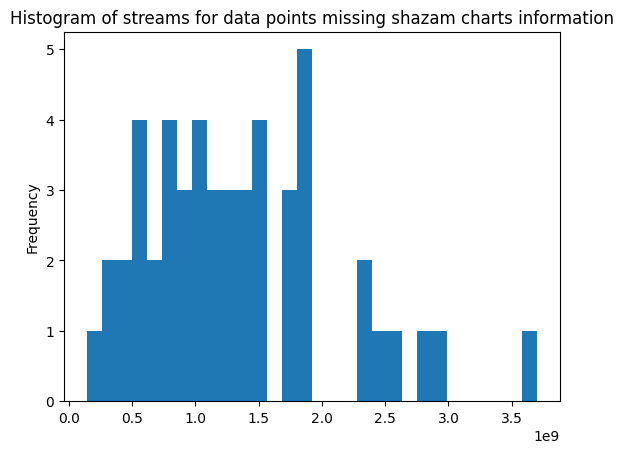

In [10]:
# plot histogram
missing_in_shazam_charts_rows['streams'].plot(kind='hist', bins=30)
plt.title("Histogram of streams for data points missing shazam charts information")

In [11]:
# Get rows with missing values in the 'key' column
missing_key_rows = df[df['key'].isnull()]

# get some information about these rows
missing_key_rows.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,9.500000e+01,95.000000,95.000000,95.000000,95.000000,86.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,1.600000,2018.210526,6.105263,15.789474,5180.621053,12.589474,5.211925e+08,72.221053,60.252632,297.589474,3.115789,83.209302,119.947368,64.378947,53.094737,63.684211,31.000000,1.326316,18.568421,7.810526
std,1.124202,11.251378,3.559446,8.151354,7546.135952,22.896852,5.260315e+08,85.969463,52.126272,908.679653,8.084478,220.711903,26.899881,14.244207,22.474607,20.636295,28.523227,6.873387,15.068392,7.829696
min,1.000000,1952.000000,1.000000,1.000000,166.000000,0.000000,1.159939e+07,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,28.000000,12.000000,9.000000,0.000000,0.000000,3.000000,3.000000
25%,1.000000,2020.000000,3.000000,10.000000,995.500000,0.000000,1.838929e+08,16.500000,14.500000,21.000000,0.000000,0.000000,96.000000,54.500000,34.000000,52.000000,8.500000,0.000000,9.500000,4.000000
50%,1.000000,2022.000000,6.000000,17.000000,1963.000000,4.000000,3.114824e+08,35.000000,52.000000,61.000000,0.000000,2.000000,120.000000,65.000000,56.000000,68.000000,23.000000,0.000000,12.000000,5.000000
75%,2.000000,2022.000000,9.000000,21.000000,5657.000000,16.000000,6.383046e+08,103.500000,96.500000,163.500000,2.000000,33.000000,138.000000,75.000000,69.500000,79.500000,48.500000,0.000000,23.000000,8.000000
max,8.000000,2023.000000,12.000000,31.000000,42798.000000,115.000000,2.322580e+09,437.000000,227.000000,6508.000000,58.000000,1173.000000,206.000000,91.000000,94.000000,94.000000,97.000000,61.000000,90.000000,45.000000


Text(0.5, 1.0, 'Histogram of streams for data points missing key information')

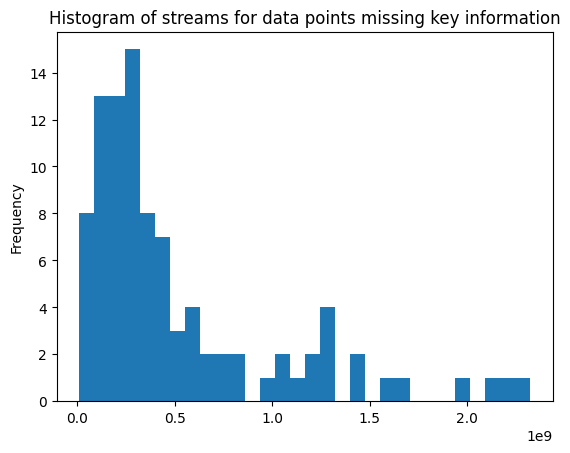

In [12]:
# plot histogram
missing_key_rows['streams'].plot(kind='hist', bins=30)
plt.title("Histogram of streams for data points missing key information")

Since the distribution of streams for data missing information about key and shazam charts information is rather disperse, instead of filling in these missing values, we made the decision to remove these data points from our dataset to avoid skewing the results.

In [13]:
# drop missing values from data frame
df = df.dropna(axis=0)

In [14]:
# check the data frame again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            816 non-null    object 
 1   artist(s)_name        816 non-null    object 
 2   artist_count          816 non-null    int64  
 3   released_year         816 non-null    int64  
 4   released_month        816 non-null    int64  
 5   released_day          816 non-null    int64  
 6   in_spotify_playlists  816 non-null    int64  
 7   in_spotify_charts     816 non-null    int64  
 8   streams               816 non-null    float64
 9   in_apple_playlists    816 non-null    int64  
 10  in_apple_charts       816 non-null    int64  
 11  in_deezer_playlists   816 non-null    int64  
 12  in_deezer_charts      816 non-null    int64  
 13  in_shazam_charts      816 non-null    float64
 14  bpm                   816 non-null    int64  
 15  key                   8

## Feature Transformation

### Merge Release Day, Month, and Year to Release Date

In [15]:
# we might need a new column where we have the complete date as a date type for each track on top of them having the year, day, and month separately
# let's name this new column release_date
df['release_date'] = pd.to_datetime({'year': df['released_year'],
                                     'month': df['released_month'],
                                     'day': df['released_day']})
df['release_date']

<ipython-input-15-692a29565f62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = pd.to_datetime({'year': df['released_year'],


0     2023-07-14
1     2023-03-23
2     2023-06-30
3     2019-08-23
4     2023-05-18
         ...    
948   2022-11-03
949   2022-10-21
950   2022-11-03
951   2022-10-20
952   2022-11-04
Name: release_date, Length: 816, dtype: datetime64[ns]

### Create Average Monthly Stream Value

In [16]:
# To overcome the time advantage of these songs, we will create a new column "streams-per-month" based on the months since the song's release.
# since the dataset updated the last time 3 months ago, we will take the end date for the calculations as August 1st, 2023
# we also consider the months that has passed ever since the song's released into our calculation
from pandas.tseries.offsets import MonthEnd
import numpy as np

df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

reference_date = pd.Timestamp('2023-09-01')

df['months_passed'] = ((reference_date - df['release_date']) / np.timedelta64(1, 'M')).astype(int)
df['avg_streams_per_month'] = df['streams'] / df['months_passed'].replace(0, np.nan)
df = df.drop(columns=['months_passed'])
df['avg_streams_per_month']

<ipython-input-16-998c4a472e3d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
<ipython-input-16-998c4a472e3d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['months_passed'] = ((reference_date - df['release_date']) / np.timedelta64(1, 'M')).astype(int)
<ipython-input-16-998c4a472e3d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

0      1.413817e+08
1      2.674326e+07
2      7.000199e+07
3      1.668418e+07
4      1.010788e+08
           ...     
948    1.016371e+07
949    1.218719e+07
950    8.168187e+06
951    1.338956e+07
952    1.066749e+07
Name: avg_streams_per_month, Length: 816, dtype: float64

### Convert Artist Count to Categorical Value

Earlier we saw that although the variable artist_count have numerical values, it is in fact a categorical variable. Let's check the categories it has.

In [17]:
df['artist_count'].value_counts()

1    493
2    224
3     75
4     14
5      5
6      3
8      1
7      1
Name: artist_count, dtype: int64

We can see that there are significantly less songs with more than 4 artists. To reduce dimensionality of our data and reduce noise, we decided to group songs with 4 and more into one group

In [18]:
for i in range(5,9):
  df['artist_count'].replace(i, 4, inplace=True)

# check value counts again
df['artist_count'].value_counts()

1    493
2    224
3     75
4     24
Name: artist_count, dtype: int64

# PART 2: DESCRIPTIVE ANALYTICS & DATA VISUALIZATION

In [19]:
# to get an overview of the data set after cleaning
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,avg_streams_per_month
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,816.000000,816.000000,816.000000,...,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02
mean,1.546569,2018.517157,6.024510,13.712010,4852.316176,11.736520,4.689858e+08,60.215686,49.534314,372.053922,...,57.622549,122.580882,67.409314,51.172794,64.356618,26.333333,1.678922,18.170343,10.535539,2.224751e+07
std,0.780302,10.701973,3.570415,9.294719,7745.565488,18.624555,5.231267e+08,74.953565,49.570536,1157.759053,...,153.616316,28.188643,14.688808,23.620742,16.116646,25.477606,8.772508,13.550239,10.222852,2.020674e+07
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,...,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000,3.452500e+02
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,1.342848e+08,12.000000,6.000000,12.750000,...,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000,9.244937e+06
50%,1.000000,2022.000000,5.000000,13.000000,2037.500000,3.000000,2.638368e+08,32.000000,34.500000,39.000000,...,3.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000,1.698954e+07
75%,2.000000,2022.000000,9.000000,22.000000,4890.750000,16.000000,6.011986e+08,78.250000,84.000000,142.250000,...,38.250000,141.250000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000,2.878921e+07
max,4.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,12367.000000,...,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,1.453867e+08


## Total Streams & Average Monthly Streams


Text(0.5, 1.0, 'Frequency distribution of total streams')

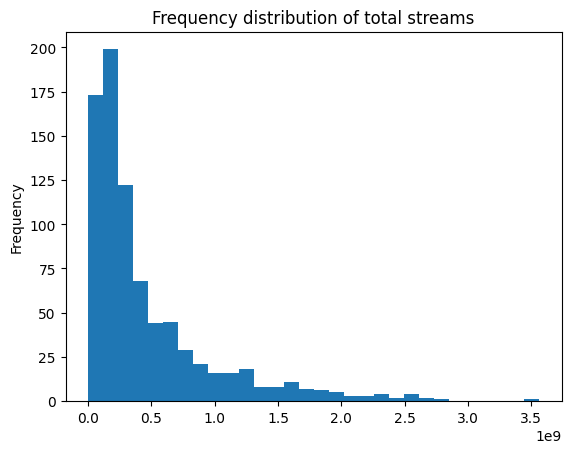

In [20]:
# let's look at the distribution of the dependent variable "stream"
df['streams'].plot(kind='hist', bins=30)
plt.title("Frequency distribution of total streams")

We can see that the distribution of streams is extremeely skewed to the left, with a large spread and some outliers on the right. At first glance, this looks like a log normal distribution. We might have to remove outliers and/or transform the data using log.

Text(0.5, 1.0, 'Frequency distribution of average monthly streams')

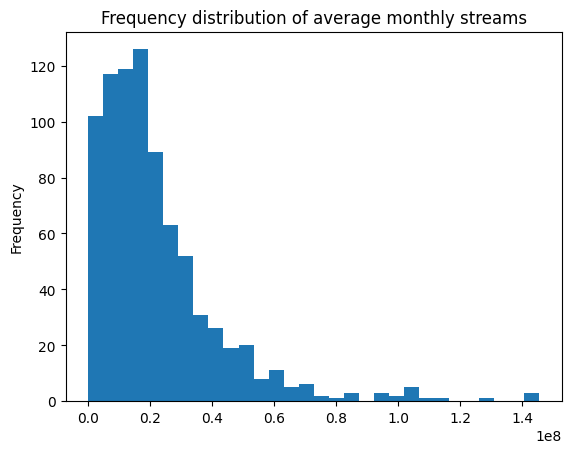

In [21]:
# let's look at the distribution of avg_streams_per_month and see if it's any different
df['avg_streams_per_month'].plot(kind='hist', bins=30)
plt.title("Frequency distribution of average monthly streams")

The distribution of average streams per month looks roughly the same.

### Log Transformation of Total Streams


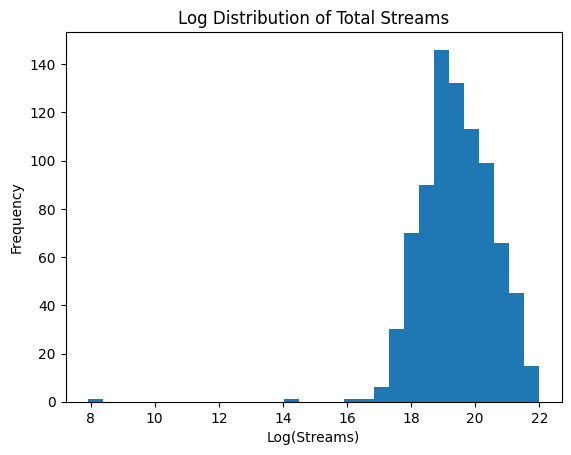

In [22]:
# to remove outliers, we need a nearly normal distribution of streams
# let's try log transformation
np.log1p(df['streams']).plot(kind='hist', bins=30)

plt.xlabel('Log(Streams)')
plt.ylabel('Frequency')
plt.title("Log Distribution of Total Streams")

# Show the plot
plt.show()

We can see from the frequency distribution that the shape of streams is nearly normal.

Next, let's find the outliers using the lognormal distribution of streams

In [23]:
Q1 = np.log1p(df['streams']).quantile(0.25)
Q3 = np.log1p(df['streams']).quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows with outliers
outliers = df[(np.log1p(df['streams']) < lower_bound) | (np.log1p(df['streams']) > upper_bound)]
outliers

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date,avg_streams_per_month
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022,12,9,763,26,2762.0,21,...,Major,49,78,64,19,0,11,4,2022-12-09,345.25
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641.0,5,...,Minor,93,68,65,42,0,12,25,2023-06-01,3985547.00
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",4,2022,12,22,138,4,1365184.0,13,...,Major,82,62,74,10,0,33,7,2022-12-22,170648.00


### Remove Outliers


In [24]:
df = df.drop(outliers.index)

## Song Features

### Numerical Song Features


Using Histograms, we wanted to look into the distribution of our numerical song features.

In [25]:
song_features = ['bpm','danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

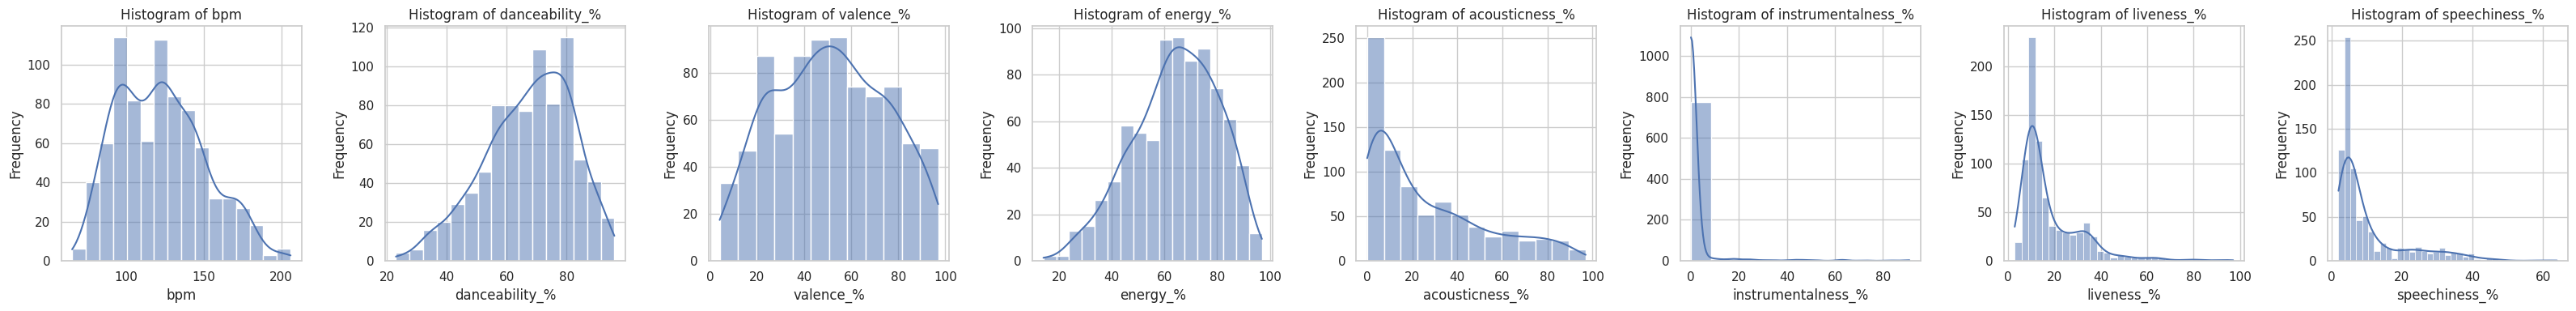

In [26]:
# some histograms related to numerical song features to draw some ideas from later on

sns.set(style="whitegrid")

# Creating a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(song_features), figsize=(32, 4))

# Plotting histograms for each selected column
for i, col in enumerate(song_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We also graphed the relationship between total streams and these song features using a scatterplot.

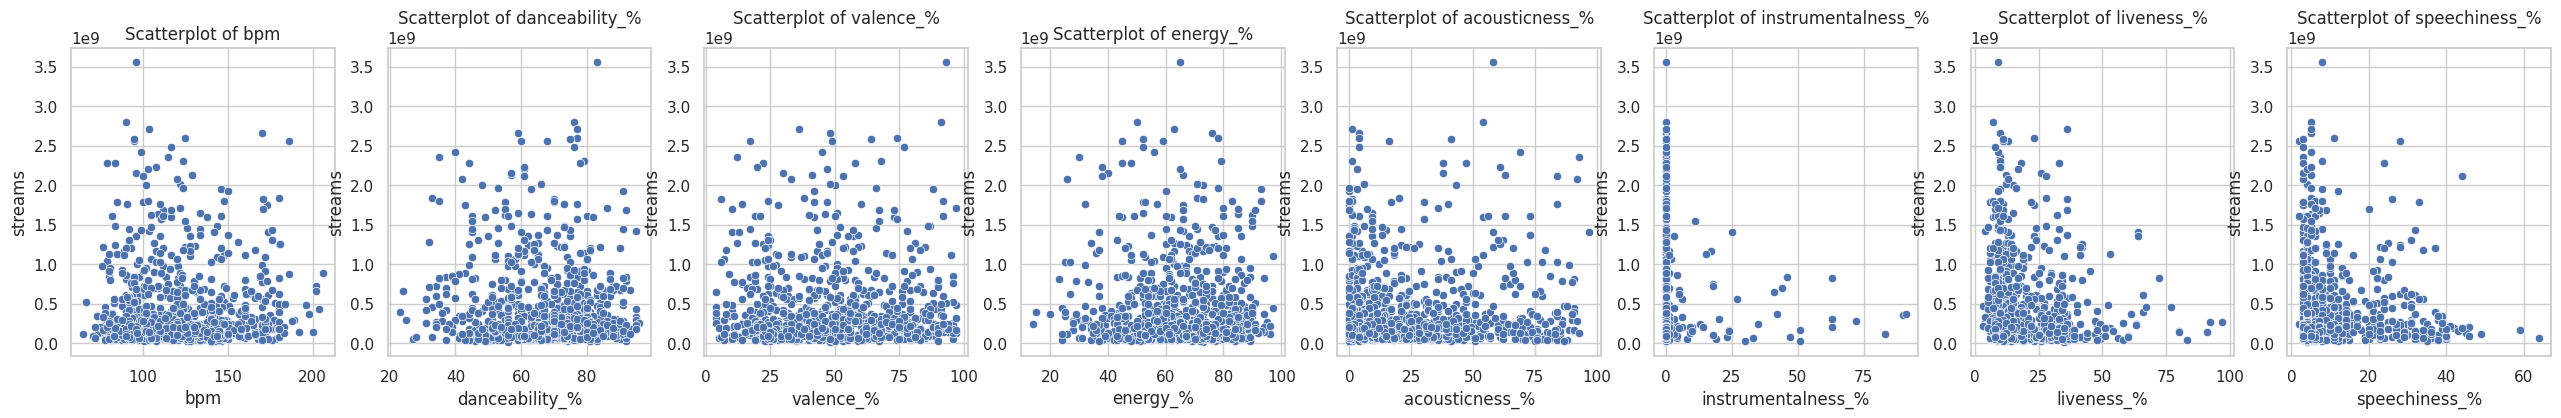

In [27]:
sns.set(style="whitegrid")

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(song_features), figsize=(32, 4))

# Create side-by-side scatterplots
for i, feature in enumerate(song_features):
    sns.scatterplot(x=feature, y='streams', data=df, ax=axes[i])
    axes[i].set_title(f'Scatterplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('streams')


From the scatterplots of artistic features such as danceability and energy of the songs vs streams, we can see that

- These are no songs on the most streamed list that are less than 20% danceable.

- Most songs on the list have a 0% instrumentalness, which means most of the top 1000 songs have vocals in it.

- Most top streamed songs tend to have low liveness, which means they were recorded instead of live versions.

- There is no obvious association betweeen bpm and streams. Danceability and energy, though having similar patterns, also have no association with streams. Sam for valence, which describes the musical positivity conveyed by a piece of music.

### Artist Count


<ipython-input-28-9f61b62e876f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='artist_count', y='streams', data=streams_by_artist_count, palette='viridis')


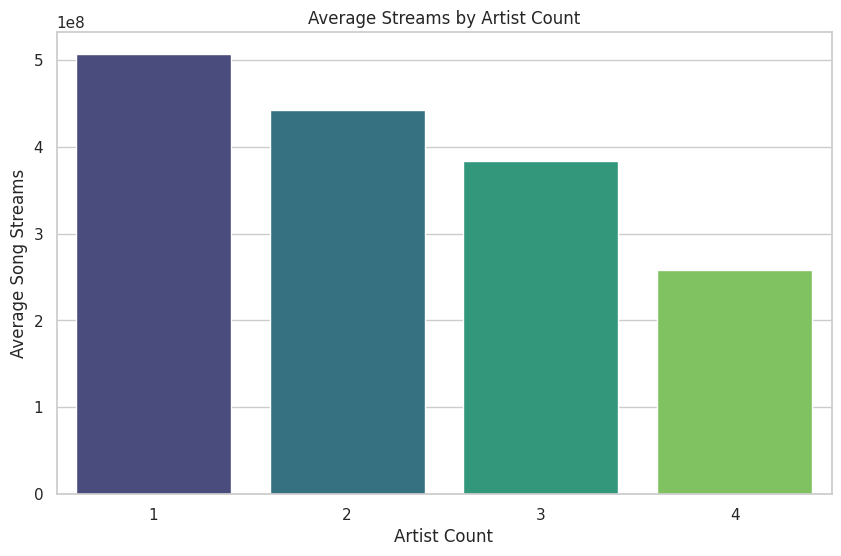

In [28]:
# What about streams by artist count? Does having more artists attract more listeners?
streams_by_artist_count = df.groupby('artist_count')['streams'].mean().reset_index()

# Sort the data by streams in descending order for a more meaningful plot
streams_by_artist_count = streams_by_artist_count.sort_values(by='streams', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='artist_count', y='streams', data=streams_by_artist_count, palette='viridis')
plt.ylabel('Average Song Streams')
plt.xlabel('Artist Count')
plt.title('Average Streams by Artist Count')
plt.show()

We can see from the plot that average streams for songs with more artists tend to be lower. However, for songs with a lot more artistis (>6), this does not apply. We need to be careful with this observation, as there are only a small amount of songs in our dataset with more than 4 artists.

<ipython-input-29-1fa8bd309e06>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='artist_count', y='avg_streams_per_month', data = motnhly_streams_by_artist_count, palette='viridis')


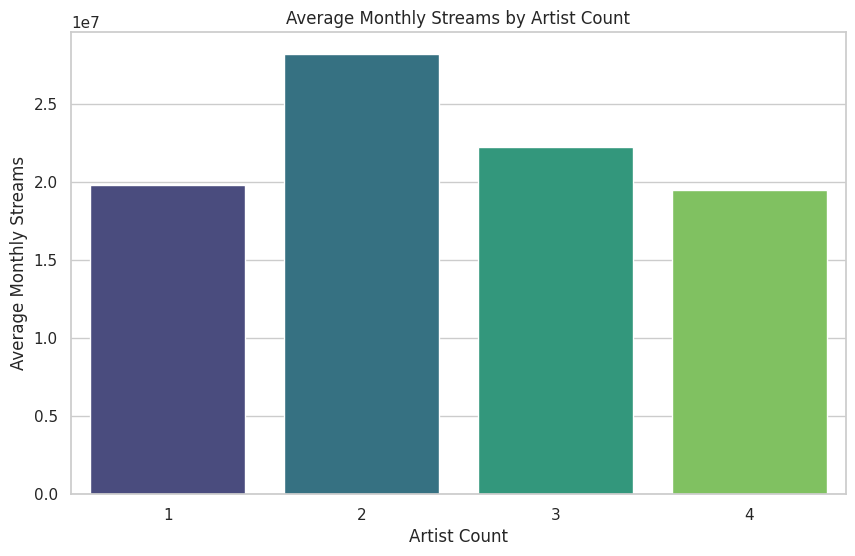

In [29]:
# What about monthly streams by artist count?
motnhly_streams_by_artist_count = df.groupby('artist_count')['avg_streams_per_month'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='artist_count', y='avg_streams_per_month', data = motnhly_streams_by_artist_count, palette='viridis')
plt.ylabel('Average Monthly Streams')
plt.xlabel('Artist Count')
plt.title('Average Monthly Streams by Artist Count')
plt.show()

From the plot, we can see that after removing the time advantages of these songs (the fact that older songs have had more time to accumulate streams on the platform), there is not obvious patterns in artist count and song streams.

Instead, let's look at box plots.

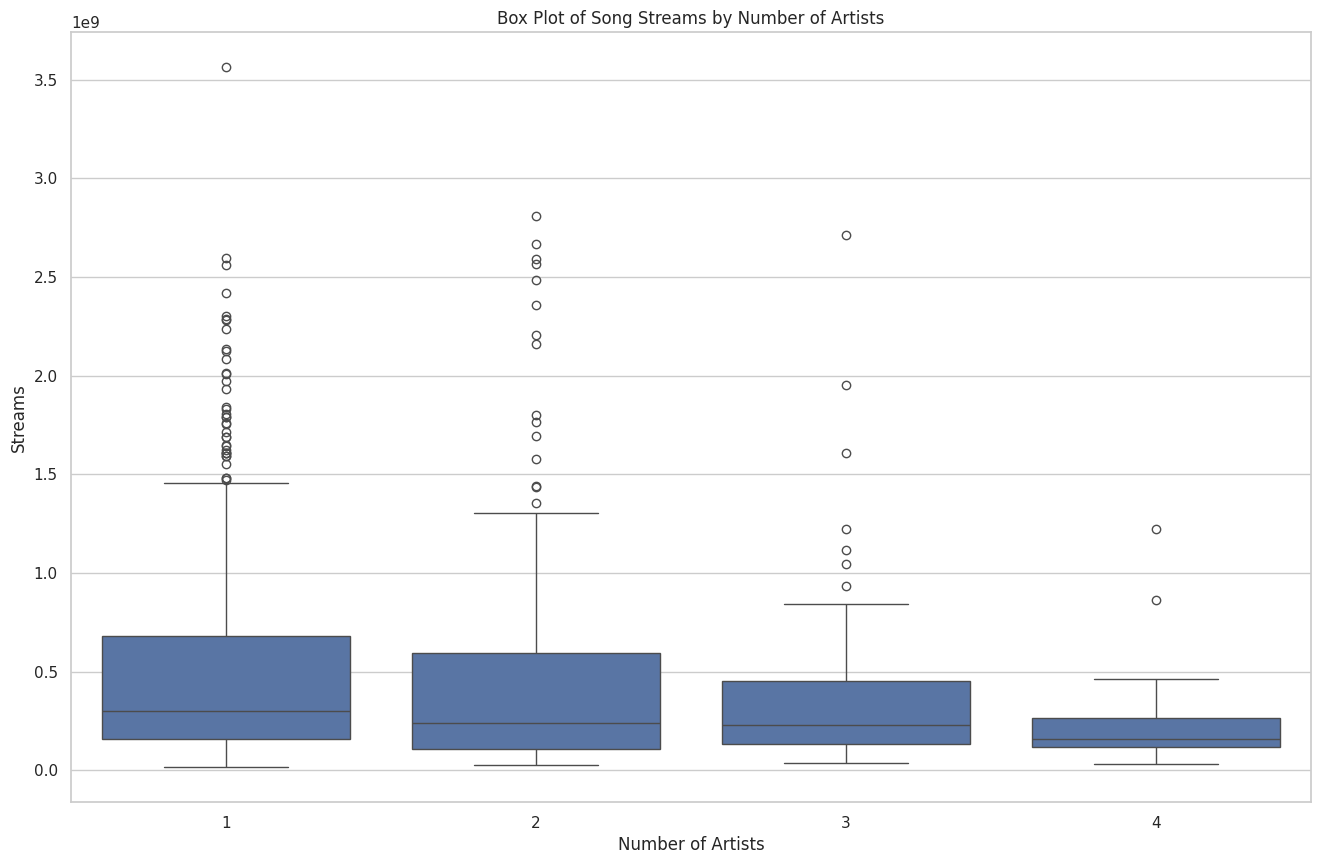

In [30]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='artist_count', y='streams', data=df)

plt.title('Box Plot of Song Streams by Number of Artists')
plt.xlabel('Number of Artists')
plt.ylabel('Streams')

plt.show()

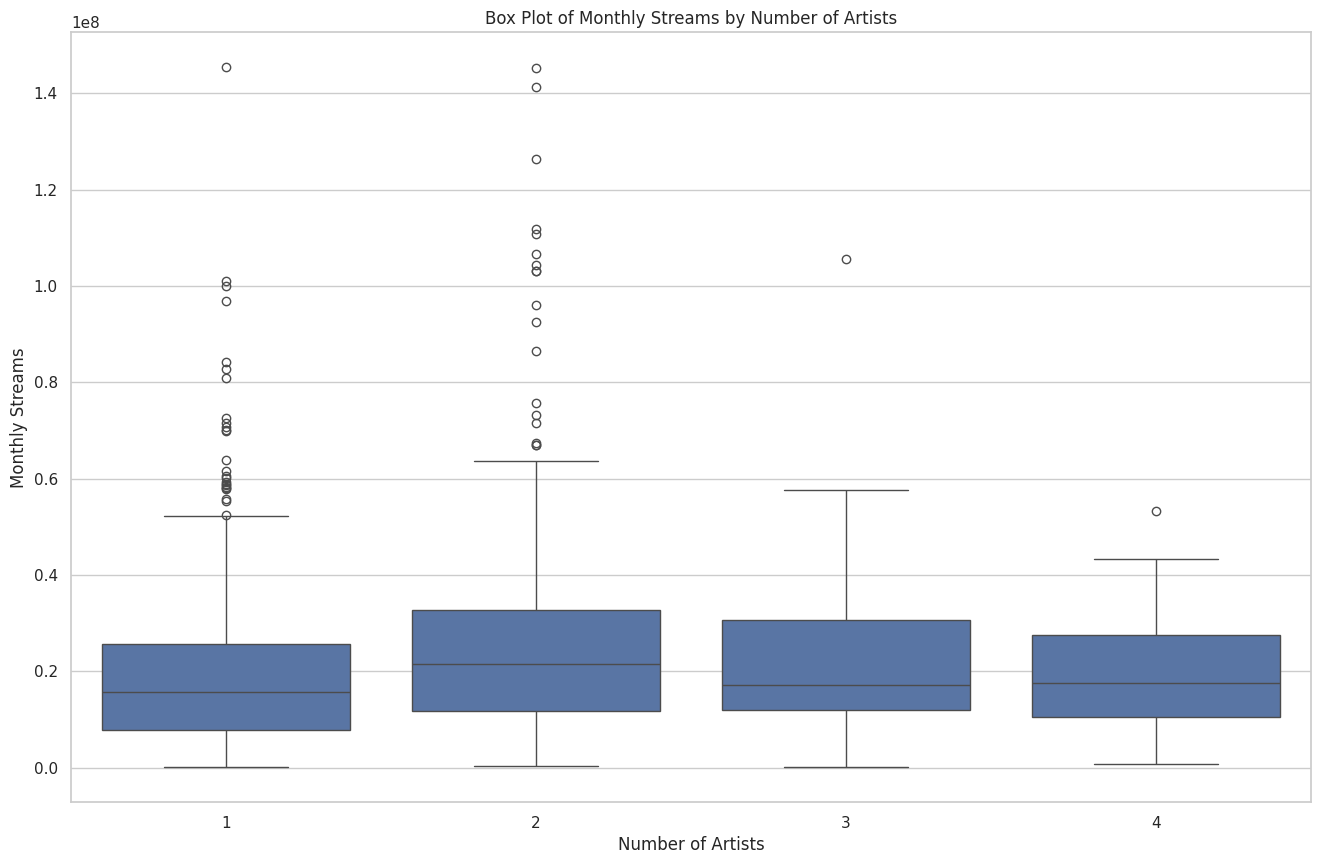

In [31]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='artist_count', y='avg_streams_per_month', data=df)

plt.title('Box Plot of Monthly Streams by Number of Artists')
plt.xlabel('Number of Artists')
plt.ylabel('Monthly Streams')

plt.show()

We can see from the box plots that although average streams for songs look similar across artist counts, the spread looks very different. There appears to be a pattern of the standard deviations of streams as artist counts grew, however, this is most likely due to most songs have less than 3 artists.

Again, there is no obvious patterns for average monthly streams across artist counts, though the average monthly streams for different artist counts look very different. In part 3, we will perfom ANOVA to determine if the average are really different across groups given the difference in spread (aka standard deviation).

### Key & Mode


In [32]:
# we can also visualize the most commonly and rarely used song key
key_counts = df['key'].value_counts()
key_counts

C#    115
G      90
F      87
G#     85
D      78
B      76
A      70
F#     69
E      59
A#     54
D#     30
Name: key, dtype: int64

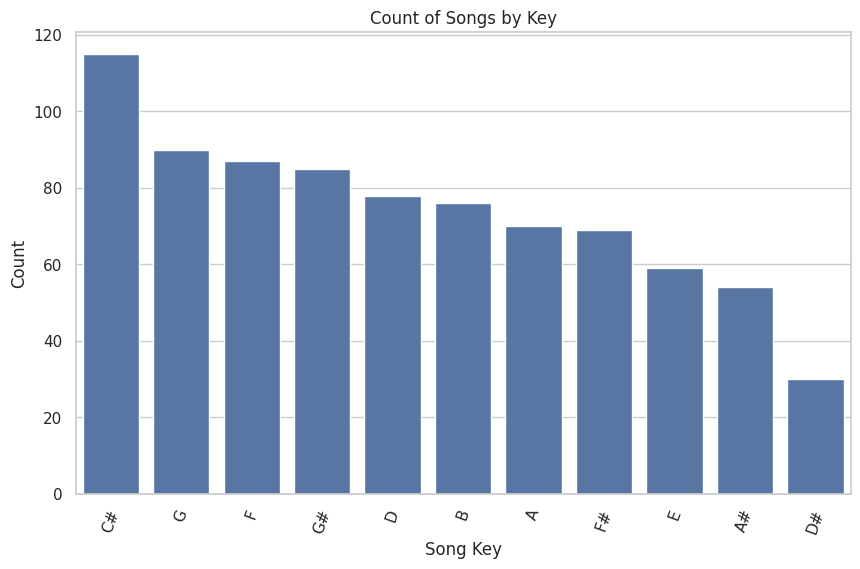

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=key_counts.index, y=key_counts)
plt.title('Count of Songs by Key')
plt.xlabel('Song Key')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

We can see that the most commonly used key in our dataset is C#, and the least common being D#. Let's compare average streams for songs with different keys.

Next, let's create box plots to look at stream distribution by song keys

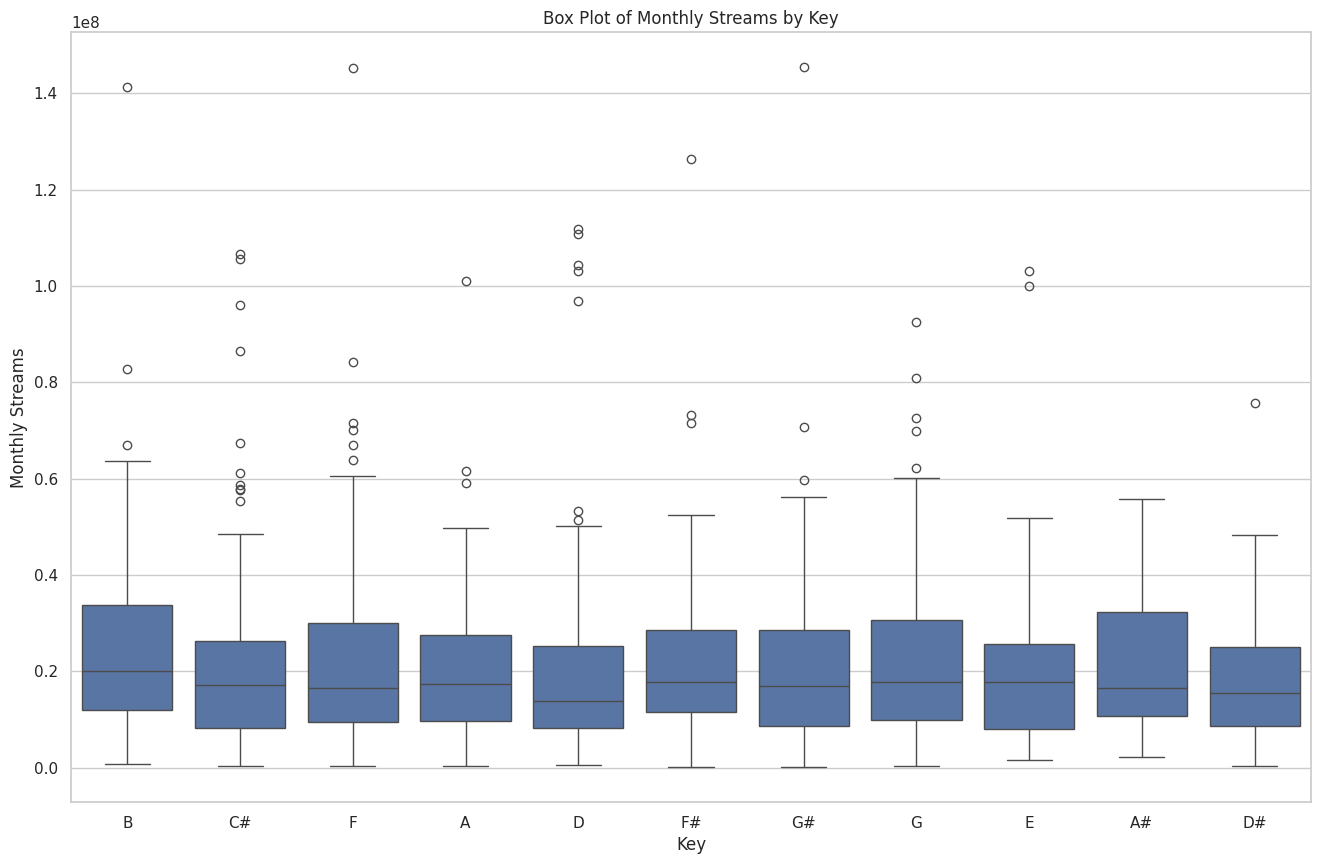

In [34]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='key', y='avg_streams_per_month', data=df)

plt.title('Box Plot of Monthly Streams by Key')
plt.xlabel('Key')
plt.ylabel('Monthly Streams')

plt.show()

In [35]:
# we can do the same for mode
mode_counts = df['mode'].value_counts()
mode_counts

Major    449
Minor    364
Name: mode, dtype: int64

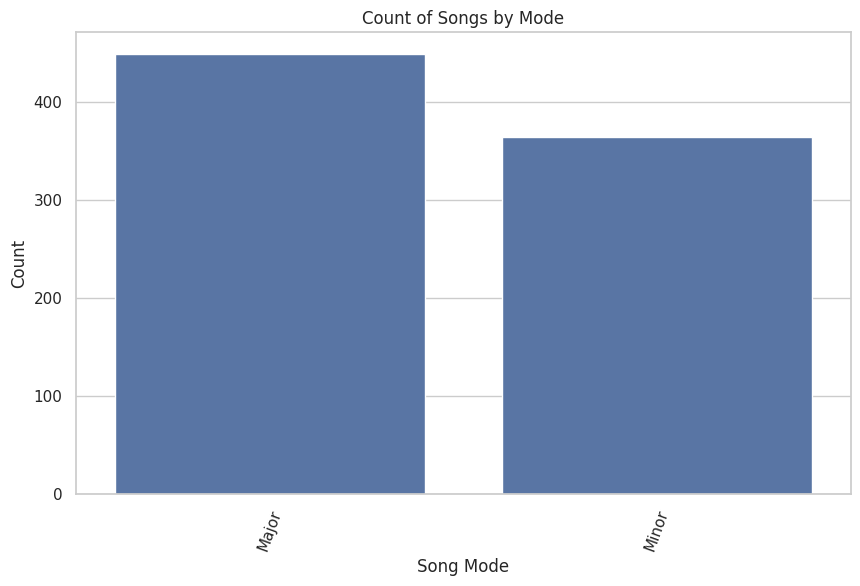

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mode_counts.index, y=mode_counts)
plt.title('Count of Songs by Mode')
plt.xlabel('Song Mode')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

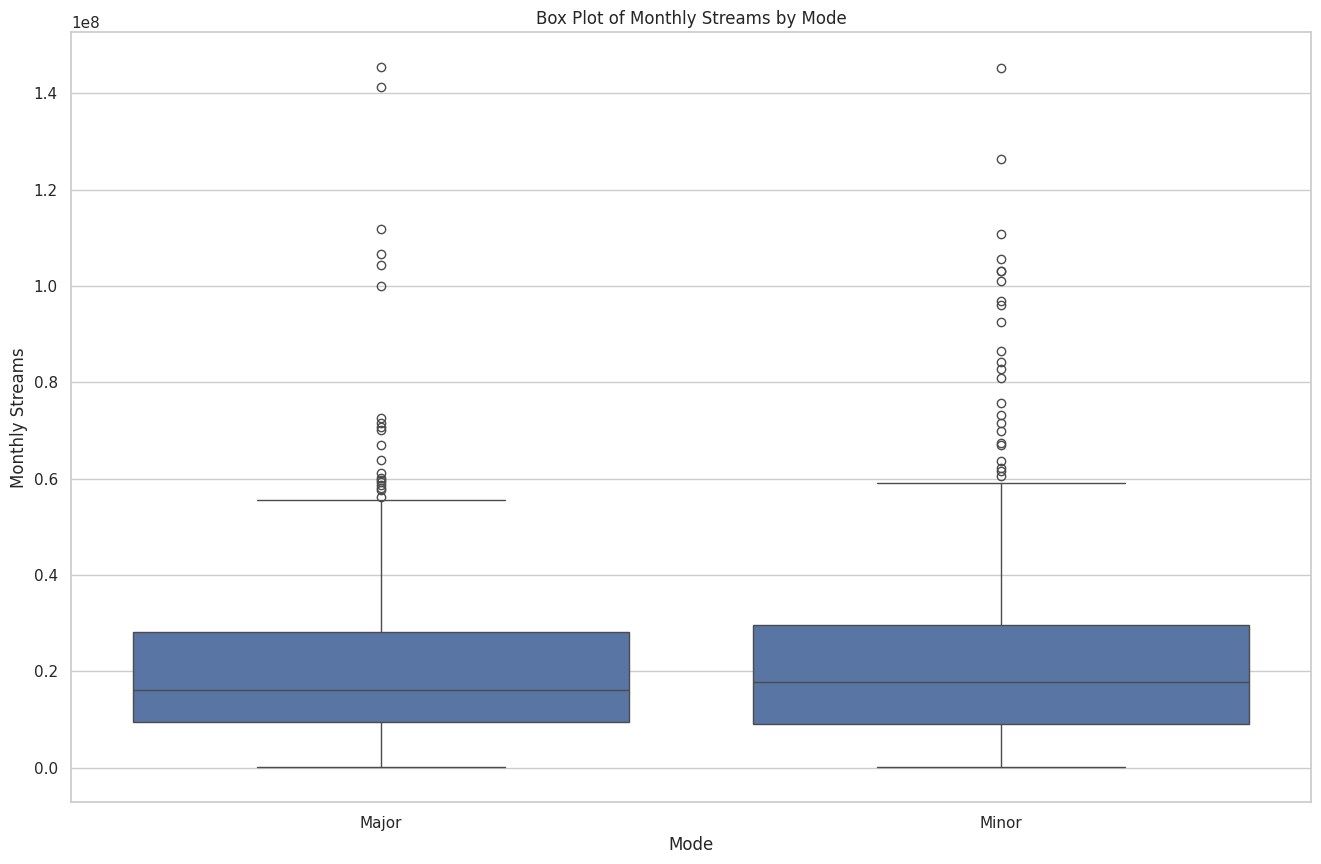

In [37]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='mode', y='avg_streams_per_month', data=df)

plt.title('Box Plot of Monthly Streams by Mode')
plt.xlabel('Mode')
plt.ylabel('Monthly Streams')

plt.show()

### Pivot Table of Artistic Features

After doing some research, we realized that the mode of a song plays a significant role in shaping the mood and vibe of the music.

In [38]:
pivot_table_result = pd.pivot_table(df,
                                    values=['danceability_%',
       'valence_%', 'energy_%', 'acousticness_%',
       'liveness_%', 'speechiness_%'],
                                    index=['mode'],
                                    aggfunc='mean')
pivot_table_result.round(1)

,acousticness_%,danceability_%,energy_%,liveness_%,speechiness_%,valence_%
mode,,,,,,
Major,27.9,65.5,63.3,18.3,9.7,49.5
Minor,24.4,69.7,65.6,18.0,11.5,53.1


Let's visualize the relationships between streams and other numerical variables that are not related to the intrinsic artistic characteristics of a song.

## Playlists

### Spotify Playlist

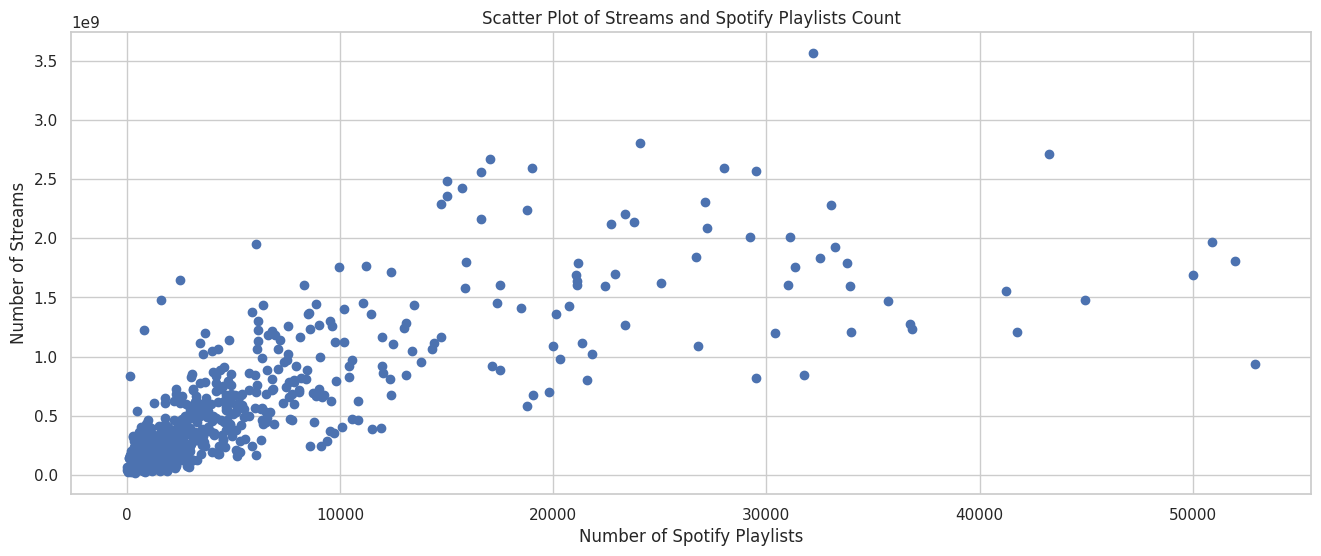

In [39]:
plt.figure(figsize=(16, 6))
plt.scatter(df['in_spotify_playlists'],df['streams'])
plt.ylabel('Number of Streams')
plt.xlabel('Number of Spotify Playlists')
plt.title("Scatter Plot of Streams and Spotify Playlists Count")
plt.show()

There seems to be a moderate association between the number of Spotify playlist a song is in and its streams. We will explore this association more in part 3. The association is weaker for songs in a large number of spotify playlists (>20000).

### Apple Playlist

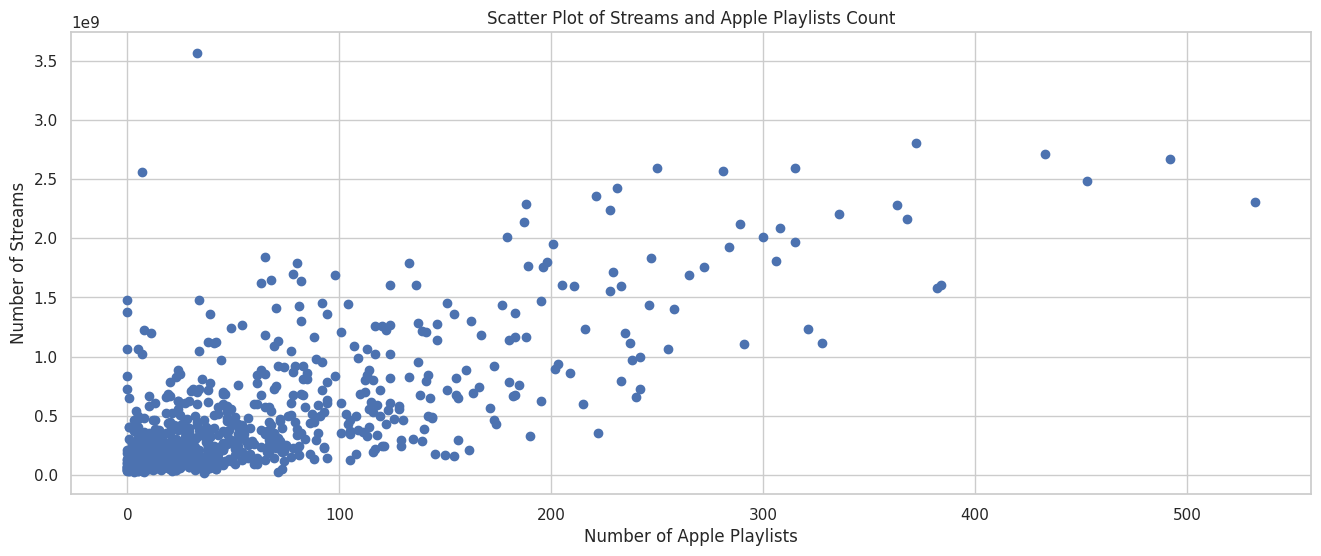

In [40]:
plt.figure(figsize=(16, 6))
plt.scatter(df['in_apple_playlists'],df['streams'])
plt.ylabel('Number of Streams')
plt.xlabel('Number of Apple Playlists')
plt.title("Scatter Plot of Streams and Apple Playlists Count")
plt.show()

## Release Month

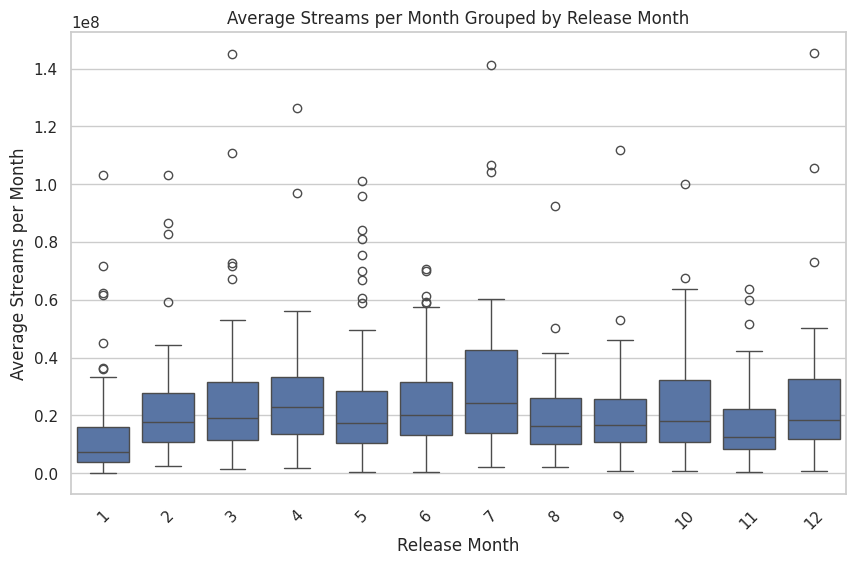

In [41]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='released_month', y='avg_streams_per_month', data=df)

plt.title('Average Streams per Month Grouped by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Streams per Month')
plt.xticks(rotation=45)  # rotates the x-axis labels for better readability

plt.show()

## Release Year

<ipython-input-42-e8d0838bdbed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=release_year_distribution.index, y=release_year_distribution.values, palette="viridis")


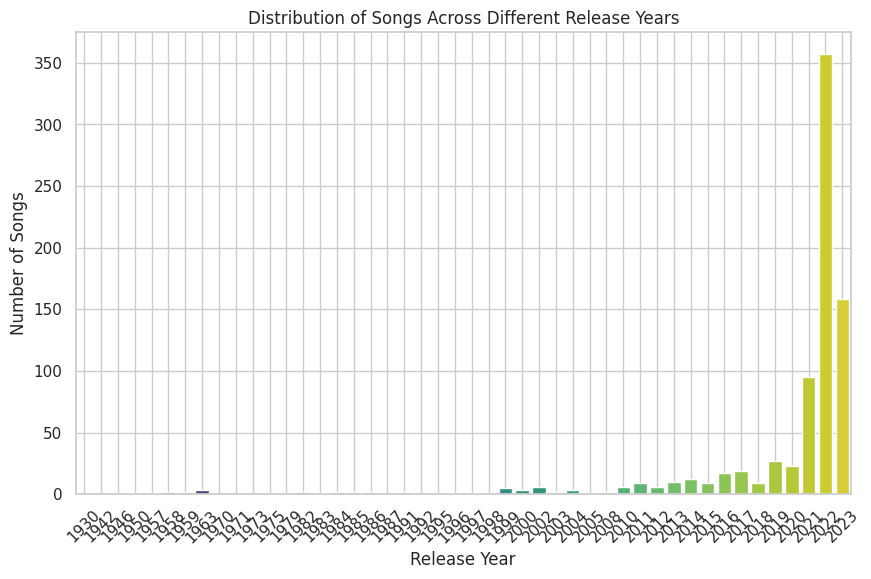

In [42]:
#Distribution of songs across different release years
release_year_distribution = df['released_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=release_year_distribution.index, y=release_year_distribution.values, palette="viridis")
plt.title("Distribution of Songs Across Different Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# PART 3: DIAGNOSTIC ANALYTICS, DATA VISUALIZATION AND TAKEAWAYS

## ANOVA

After visualizing data distribution by categorical variables (artist_count, key and mode), we wanted to test if the streams and avg monthly streams are truly different across different levels of the categorical variables

### Artist Count vs Streams


As we can see from the box plots in part 2, there is a lot of noise for songs with artist count > 4. For this reason, we decided to do an ANOVA analysis only for 4 groups within the artist count variable (1, 2, 3 and 4) to test if the mean avg streams are truly different.

In [43]:
# create a subset of only four groups
df_subset = df[df['artist_count'].isin([1, 2, 3, 4])]

# Fit the model and perform ANOVA
model_subset_monthly = ols('avg_streams_per_month ~ C(artist_count)', data=df_subset).fit()
anova_table_monthly = sm.stats.anova_lm(model_subset_monthly, typ=2)

# display ANOVA table
print(anova_table_monthly)

                       sum_sq     df         F    PR(>F)
C(artist_count)  1.090684e+16    3.0  9.175603  0.000006
Residual         3.205469e+17  809.0       NaN       NaN


Given the p-value of 0.000006, we have enough evidence to reject to null hypothesis that the group means of **avg monthly streams** are the same and conclude with 95% confidence that at least one of the groups has a different group mean than the rest

What about total streams?

In [44]:
# create a subset of only four groups
df_subset = df[df['artist_count'].isin([1, 2, 3, 4])]

# Fit the model and perform ANOVA
model_subset_streams = ols('streams ~ C(artist_count)', data=df_subset).fit()
anova_table_streams = sm.stats.anova_lm(model_subset_streams, typ=2)

# display ANOVA table
print(anova_table_streams)

                       sum_sq     df         F    PR(>F)
C(artist_count)  2.405149e+18    3.0  2.948409  0.032033
Residual         2.199792e+20  809.0       NaN       NaN


We do not have enough evidence to reject the null hypothesis that group means for **total streams** across artistic counts are the same. One potential reason for this could be artist count gives the wow factor and is associated with higher/lower streams in the short run, however, over time this impact disappears.

#### ANOVA Post-Hoc Test

From our ANOVA analysis, we concluded that at least one of the group means of **avg monthly streams** differ from each other. Thus, we initiated a post-hoc test to see which groups have different means.

In [45]:
pip install scikit-posthocs

In [46]:
import scikit_posthocs as sp
p_values1 = sp.posthoc_dunn(df, val_col='avg_streams_per_month', group_col='artist_count')
print(p_values1)

          1         2         3         4
1  1.000000  0.000002  0.125544  0.576665
2  0.000002  1.000000  0.150235  0.230016
3  0.125544  0.150235  1.000000  0.766505
4  0.576665  0.230016  0.766505  1.000000


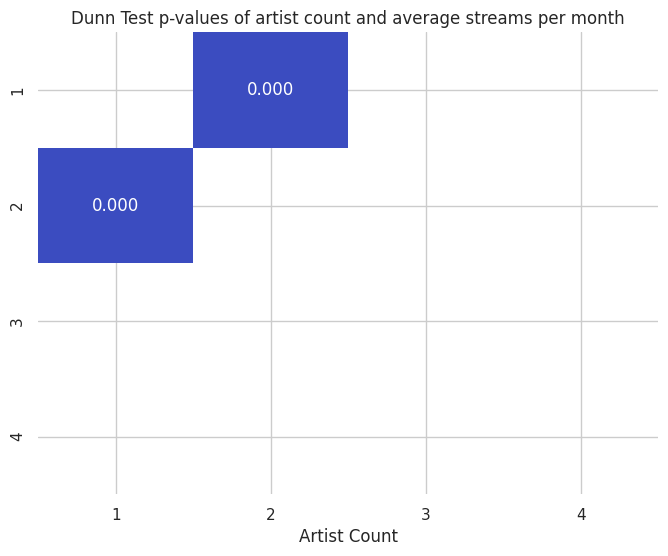

In [47]:
alpha = 0.05
mask = p_values1 < alpha

plt.figure(figsize=(8, 6))
sns.heatmap(p_values1, annot=True, cmap='coolwarm', fmt=".3f", mask=~mask, cbar=False)

plt.title("Dunn Test p-values of artist count and average streams per month")
plt.xlabel("Artist Count")
plt.show()

From our Dunn test results, we concluded that the songs with **1 artist** & **and 2 artists** have a statistically significant mean group difference of average monthly stream that couldn't have occured due to random chance alone.

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(endog=df['avg_streams_per_month'], groups=df['artist_count'], alpha=0.05)
print(tukey_results)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
group1 group2    meandiff   p-adj      lower          upper     reject
----------------------------------------------------------------------
     1      2  8368104.8075    0.0   4226229.2062 12509980.4089   True
     1      3  2399452.0306 0.7651  -3951868.8326  8750772.8939  False
     1      4  -300170.4696 0.9999 -11231713.0335 10631372.0943  False
     2      3 -5968652.7769 0.1121 -12812732.8613   875427.3075  False
     2      4 -8668275.2771 0.1933 -19893282.1065  2556731.5523  False
     3      4 -2699622.5003 0.9413 -14913750.4483  9514505.4478  False
----------------------------------------------------------------------


To strengthen our conclusion, we decided to do another post-hoc test, this time with Tukey test. The results show the same conclusion as Dunn test, that the songs with **1 artist** & **and 2 artists** have a statistically significant mean group difference of average monthly stream that couldn't have occured due to random chance alone.

### Release Month vs Streams

We can do the same analysis across release months to see if there is any trends in seasonality.

In [49]:
# Fit the model and perform ANOVA
model_month = ols('avg_streams_per_month ~ C(released_month)', data=df).fit()
anova_table_month = sm.stats.anova_lm(model_month, typ=2)

# display ANOVA table
print(anova_table_month)

                         sum_sq     df        F        PR(>F)
C(released_month)  2.045875e+16   11.0  4.79033  3.622793e-07
Residual           3.109950e+17  801.0      NaN           NaN


Given the p-value of 3.622793e-07, we have enough evidence to reject to null hypothesis that the group means of **avg monthly streams** are the same and conclude with 95% confidence that at least one of the months has a different group mean for average monthly streams than the rest.

What about total streams?

In [50]:
# Fit the model with total streams and perform ANOVA
model_month_total = ols('streams ~ C(released_month)', data=df).fit()
anova_table_month_total = sm.stats.anova_lm(model_month_total, typ=2)

# display ANOVA table
print(anova_table_month_total)

                         sum_sq     df         F        PR(>F)
C(released_month)  1.582141e+19   11.0  5.577412  1.175394e-08
Residual           2.065629e+20  801.0       NaN           NaN


Given the p-value of 1.175394e-08, we have enough evidence to reject to null hypothesis that the group means of **total streams** are the same and conclude with 95% confidence that at least one of the months has a different group mean for average monthly streams than the rest.

####ANOVA Post-Hoc Test

From our ANOVA analysis, we concluded that at least one of the group means of **avg monthly streams** and **total streams** differ from each other. Thus, we initiated a post-hoc test to see which groups have different means.

In [51]:
import scikit_posthocs as sp
p_values2 = sp.posthoc_dunn(df, val_col='avg_streams_per_month', group_col='released_month')
print(p_values2)

              1         2             3             4             5   \
1   1.000000e+00  0.000006  1.365643e-08  8.237629e-10  1.601646e-07   
2   5.846530e-06  1.000000  5.852460e-01  2.566313e-01  7.255836e-01   
3   1.365643e-08  0.585246  1.000000e+00  5.112836e-01  2.954276e-01   
4   8.237629e-10  0.256631  5.112836e-01  1.000000e+00  8.569238e-02   
5   1.601646e-07  0.725584  2.954276e-01  8.569238e-02  1.000000e+00   
6   4.219422e-10  0.299250  5.904533e-01  8.913544e-01  1.019035e-01   
7   3.160427e-10  0.091867  2.007922e-01  5.122981e-01  2.231383e-02   
8   1.006140e-03  0.515768  2.368398e-01  8.876380e-02  6.701490e-01   
9   3.171465e-04  0.535142  2.352152e-01  8.280720e-02  7.029220e-01   
10  2.657194e-07  0.768359  7.998986e-01  3.796234e-01  4.706596e-01   
11  7.170172e-03  0.066615  1.012153e-02  1.801339e-03  7.028965e-02   
12  1.119647e-07  0.713054  8.567782e-01  4.148929e-01  4.145976e-01   

              6             7         8         9             1

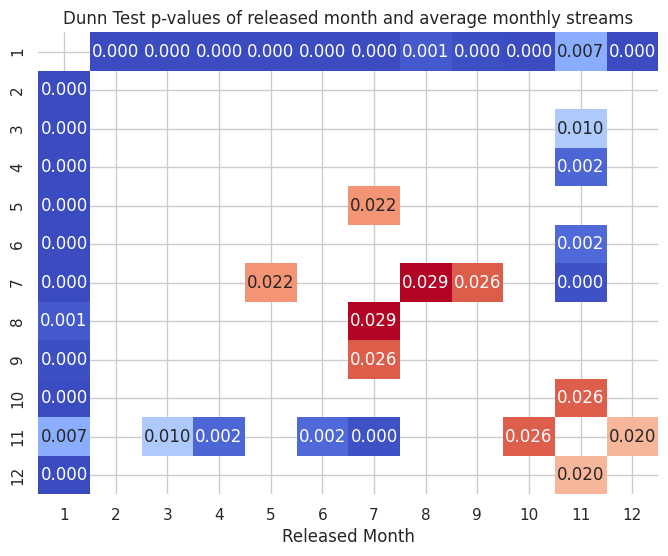

In [52]:
alpha = 0.05
mask = p_values2 < alpha

plt.figure(figsize=(8, 6))
sns.heatmap(p_values2, annot=True, cmap='coolwarm', fmt=".3f", mask=~mask, cbar=False)

plt.title("Dunn Test p-values of released month and average monthly streams")
plt.xlabel("Released Month")
plt.show()

From our Dunn test results, we concluded that there are multiple group pairs that have a statistically significant mean group difference of average monthly stream that couldn't have occured due to random chance alone. Some notable ones are **January with all of the months**, as well as **July-November**.

In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(endog=df['avg_streams_per_month'], groups=df['released_month'], alpha=0.05)
print(tukey_results)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
group1 group2    meandiff    p-adj      lower          upper     reject
-----------------------------------------------------------------------
     1      2  10850032.5177 0.0463      82064.164 21618000.8714   True
     1      3  12809626.5893 0.0011   3094372.4131 22524880.7655   True
     1      4  13421498.2249  0.001   3250150.9412 23592845.5087   True
     1      5   9830681.9418 0.0102   1237944.7899 18423419.0938   True
     1      6  12345334.0338 0.0022   2589320.4462 22101347.6214   True
     1      7  19827575.7709    0.0   8602756.2626 31052395.2791   True
     1      8    7072065.877 0.7517  -5052984.8561   19197116.61  False
     1      9   7637819.0636 0.5403  -3672617.3066 18948255.4337  False
     1     10   11457085.072 0.0126   1285737.7882 21628432.3557   True
     1     11   4193332.9892 0.9686  -5828975.5067 14215641.4851  False
     1     12  11944555.2627 0.0057   1922246.7668 21966863.7585

To strengthen our conclusion, we decided to do another post-hoc test, this time with Tukey test. The results show the same conclusion as Dunn test, that there are multiple group pairs that have a statistically significant mean group difference of average monthly stream that couldn't have occured due to random chance alone. However, this time around, pairs **January-August**, **January-September**, and **January-November** are excluded from our conclusion.

In [54]:
import scikit_posthocs as sp
p_values3 = sp.posthoc_dunn(df, val_col='streams', group_col='released_month')
print(p_values3)

              1         2         3         4         5             6   \
1   1.000000e+00  0.002535  0.001449  0.001540  0.000001  3.218269e-08   
2   2.535397e-03  1.000000  0.892905  0.980327  0.391612  6.672248e-02   
3   1.448995e-03  0.892905  1.000000  0.908798  0.266045  3.201490e-02   
4   1.540256e-03  0.980327  0.908798  1.000000  0.348997  5.114947e-02   
5   1.210584e-06  0.391612  0.266045  0.348997  1.000000  2.082759e-01   
6   3.218269e-08  0.066722  0.032015  0.051149  0.208276  1.000000e+00   
7   5.023859e-03  0.937286  0.963617  0.953793  0.361460  6.378241e-02   
8   7.611724e-01  0.008378  0.007360  0.006809  0.000175  8.589847e-06   
9   7.502945e-01  0.005530  0.004499  0.004249  0.000059  2.357579e-06   
10  7.700926e-01  0.014143  0.011798  0.011056  0.000133  4.773886e-06   
11  2.190499e-01  0.090079  0.089595  0.080324  0.003260  1.556564e-04   
12  1.383991e-03  0.969306  0.919349  0.988672  0.333683  4.670375e-02   

          7         8         9      

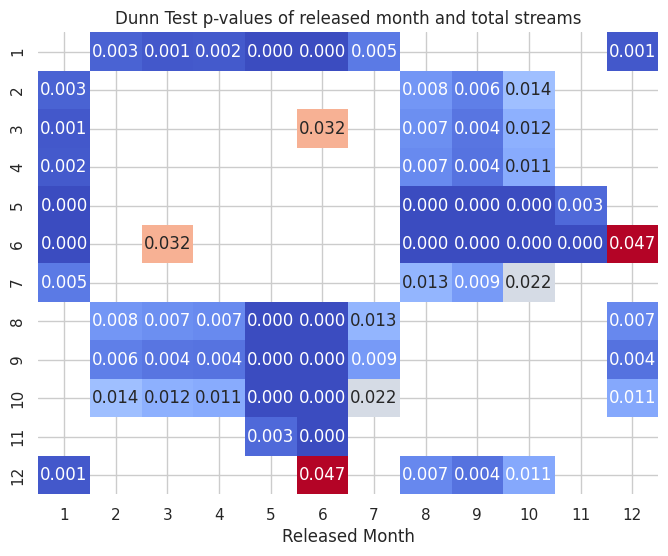

In [55]:
alpha = 0.05
mask = p_values3 < alpha

plt.figure(figsize=(8, 6))
sns.heatmap(p_values3, annot=True, cmap='coolwarm', fmt=".3f", mask=~mask, cbar=False)

plt.title("Dunn Test p-values of released month and total streams")
plt.xlabel("Released Month")
plt.show()

Again, from our Dunn test results, we concluded that there are multiple group pairs that have a statistically significant mean group difference of total streams that couldn't have occured due to random chance alone. Some notable ones are **January-May, January-June, May-August, May-September, May-October, June-August, June-September, June-October, and June-November**.

In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(endog=df['streams'], groups=df['released_month'], alpha=0.05)
print(tukey_results)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
group1 group2     meandiff    p-adj       lower           upper      reject
---------------------------------------------------------------------------
     1      2 -369729565.7645 0.0009 -647242503.3708  -92216628.1582   True
     1      3 -309825286.0237 0.0032  -560207590.047  -59442982.0005   True
     1      4 -326615595.0972 0.0028 -588752366.9953  -64478823.1991   True
     1      5 -371778685.2046    0.0 -593231391.1186 -150325979.2905   True
     1      6 -376370813.2024 0.0001   -627803572.02 -124938054.3847   True
     1      7 -313647752.8203 0.0205 -602934694.7504  -24360810.8902   True
     1      8 -133927519.3186 0.9626 -446415292.0386  178560253.4014  False
     1      9    2433780.2958    1.0 -289059686.2155  293927246.8071  False
     1     10 -189156895.8909 0.4312  -451293667.789   72979876.0072  False
     1     11 -253179136.0244 0.0608  -511474868.417    5116596.3683  False
     1     1

Again, we ran a Tukey test. The results show similar conclusion as Dunn test, that there are multiple group pairs that have a statistically significant mean group difference of total stream that couldn't have occured due to random chance alone. However, this time around, pairs **May-August, May-October, June-August, June-October, and June-November** are excluded from our conclusion.

### Key vs Streams

Now, we analyze across song key to see if there is any significant trends.

In [57]:
label_encoder = LabelEncoder()
df_encoded = df.copy()
df_encoded['key_encoded'] = label_encoder.fit_transform(df_encoded['key'])

In [58]:
df_encoded.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date,avg_streams_per_month,key_encoded
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,80,89,83,31,0,8,4,2023-07-14,1.413817e+08,2
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,71,61,74,7,0,10,4,2023-03-23,2.674326e+07,3
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,51,32,53,17,0,31,6,2023-06-30,7.000199e+07,7
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,55,58,72,11,0,11,15,2019-08-23,1.668418e+07,0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,65,23,80,14,63,11,6,2023-05-18,1.010788e+08,0


In [59]:
model_key = ols('avg_streams_per_month ~ C(key_encoded)', data=df_encoded).fit()
anova_table_key = sm.stats.anova_lm(model_key, typ=2)
print(anova_table_key)

                      sum_sq     df         F    PR(>F)
C(key_encoded)  1.770306e+15   10.0  0.430651  0.931948
Residual        3.296834e+17  802.0       NaN       NaN


Given the p-value of 0.931948, we can conclude with 95% confidence that we don't have enough evidence to reject to null hypothesis that the group means of **avg monthly streams** are the same.

In [60]:
model_key = ols('streams ~ C(key_encoded)', data=df_encoded).fit()
anova_table_key = sm.stats.anova_lm(model_key, typ=2)
print(anova_table_key)

                      sum_sq     df         F    PR(>F)
C(key_encoded)  2.474988e+18   10.0  0.902618  0.530166
Residual        2.199093e+20  802.0       NaN       NaN


Given the p-value of 0.530166, we can conclude with 95% confidence that we don't have enough evidence to reject to null hypothesis that the group means of **total streams** are the same.

## Correlation Matrix

Now, lets look into the correlation of our variables. Initially, we were curious to see if there's any statistical significant correlations between any of our variables. We decided to create a correlation matrix for our dataframe.

In [61]:
correlation_table = df.corr()

<ipython-input-61-abc2845c9d45>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = df.corr()


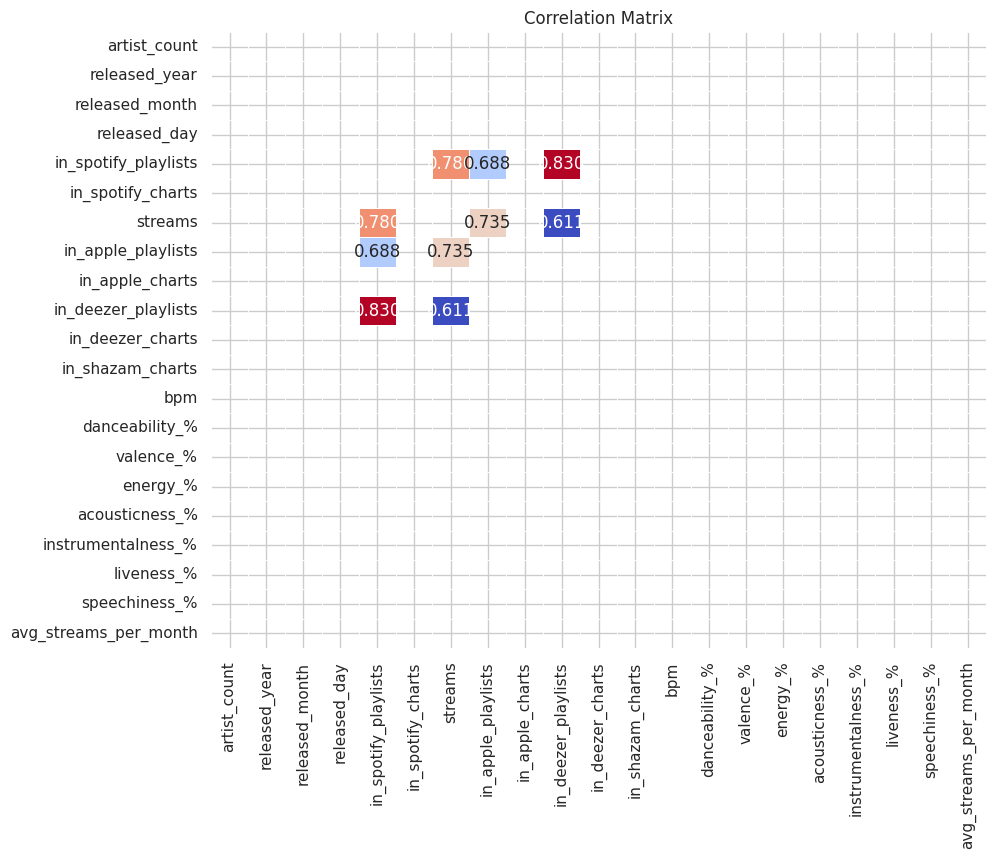

In [62]:
alpha = 0.6
mask = (correlation_table > alpha) & (correlation_table != 1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, mask=~mask, cbar=False)
plt.title('Correlation Matrix')
plt.show()

We decided to only focus on the correlations that are larger than 0.6. Based on the correlation matrix, some of the notable variable correlations are **number of spotify playlists and number of deezer playlists** (r=0.83), **number of spotify playlists and total streams** (r=0.78), **number of apple playlists and total streams** (r=0.735), **number of spotify playlists and number of apple playlists** (r=0.688), and **number of deezer playlists and total streams** (r=0.611).

After reviewing correlations between some significant features, we decided to focus on the linear relationships of our numerical variables, such as **total streams, avg monthly streams, number of spotify playlists, number of apple playlists, and number of deezer playlists**, with the rest of our variables.

In [63]:
cm1 = df.corr()['streams']

<ipython-input-63-f195fc13aa56>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm1 = df.corr()['streams']


In [64]:
cm2 = df.corr()['avg_streams_per_month']

<ipython-input-64-e2d94fef3d0d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm2 = df.corr()['avg_streams_per_month']


In [65]:
cm3 = df.corr()['in_spotify_playlists']

<ipython-input-65-03ef00f9e8cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm3 = df.corr()['in_spotify_playlists']


In [66]:
cm4 = df.corr()['in_apple_playlists']

<ipython-input-66-c9389852bfba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm4 = df.corr()['in_apple_playlists']


In [67]:
cm5 = df.corr()['in_deezer_playlists']

<ipython-input-67-3b038bd88798>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm5 = df.corr()['in_deezer_playlists']


In [68]:
merged_correlation = pd.merge(cm1,pd.merge(cm2,pd.merge(cm3,pd.merge(cm4,cm5,left_index=True, right_index=True),left_index=True, right_index=True),left_index=True, right_index=True),left_index=True, right_index=True)

In [69]:
merged_correlation

,streams,avg_streams_per_month,in_spotify_playlists,in_apple_playlists,in_deezer_playlists
artist_count,-0.102661,0.085969,-0.079090,-0.005493,-0.066191
released_year,-0.241968,0.298373,-0.396631,-0.206678,-0.321351
released_month,-0.042567,0.060385,-0.121155,-0.032861,-0.101673
released_day,-0.026251,0.091297,-0.109086,-0.013831,-0.095215
in_spotify_playlists,0.780133,-0.038218,1.000000,0.687895,0.829630
in_spotify_charts,0.214624,0.584705,0.141383,0.208088,0.077816
streams,1.000000,0.196402,0.780133,0.734877,0.610804
in_apple_playlists,0.734877,0.244319,0.687895,1.000000,0.468295
in_apple_charts,0.270934,0.475916,0.216529,0.365589,0.137514
in_deezer_playlists,0.610804,-0.107665,0.829630,0.468295,1.000000


As we would potentially use the average monthly streams and total streams as our response variable, we noted down the top 3 variables with the highest correlation with our response variables. For **avg monthly streams**, our top 3 correlated variables are **spotify charts presence** (r=0.585), **deezer charts presence** (r=0.576), and **apple charts presence** (r=0.476). Meanwhile, for **total streams**, our top 3 correlated variables are **number of spotify playlists** (r=0.78), **number of apple playlists** (r=0.735), and **number of deezer playlists** (r=0.61)

## NLP: Song Titles

We wanted to see if there are any patterns in the song titles, so we performed some NLP tasks on the variable "track_name".

In [70]:
from collections import defaultdict
import matplotlib.pyplot as plt

df3 = df.copy()

# Preprocess the Data
#df3['processed_track_name'] = df3['track_name'].str.lower().str.split()

track_name_list = df3.track_name.to_list()
allText = '|'.join(track_name_list)

In [71]:
# Import the nltk package
import nltk
# Download the punkt package using: nltk.download('punkt')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [72]:
# Tokenize the words in the text
tokens = nltk.word_tokenize(allText)

In [73]:
# Count # of occurrences of each word
wordFrequency = nltk.FreqDist(tokens)

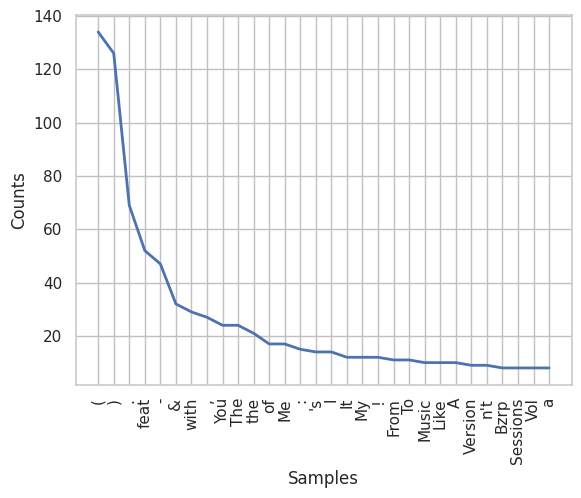

<Axes: xlabel='Samples', ylabel='Counts'>

In [74]:
# Visualize the word frequency
wordFrequency.plot(30)

In [75]:
# Only keep tokens that have letters
words1 = [token for token in tokens if token.isalpha()]

In [76]:
# Fold words to lower case
words2 = [word.lower() for word in words1]

In [77]:
# Get the stop words list
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [78]:
# Filter out stop words from reviews
# Removing commonly occurring words
words3 = [word for word in words2 if word not in stopWords]

In [79]:
# Count # of occurrences of each word
wordFrequency3 = nltk.FreqDist(words3)

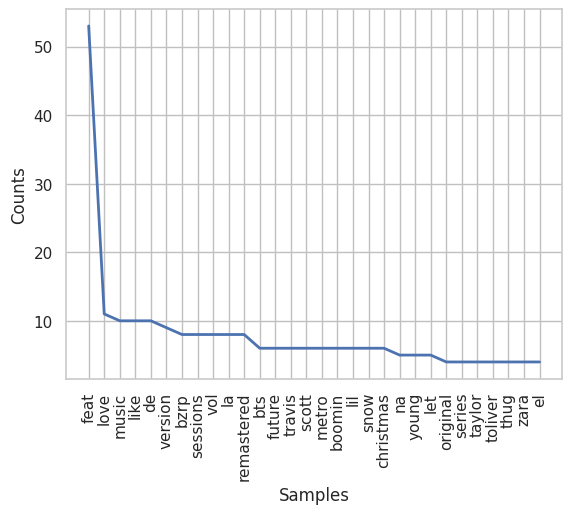

<Axes: xlabel='Samples', ylabel='Counts'>

In [80]:
# Visualize the refined word frequency
wordFrequency3.plot(30)

- The word "feat" which is used when artists collaborate on a song appeared over 50 times on the top streamed songs on Spotify, proving that there is some value in creative collaboration.

- We can see some common themes like "love" and seasonal themes like snow and christmas as common words. A limitation to this is that the dataset, especially qualitative data need further cleaning as we can see some artist names mixed in the track names.

# PART 4: PREDICTIVE ANALYTICS, DATA VISUALIZATION AND TAKEAWAYS

## One-Hot Encoding

Since key and mode are all categorical variables, we made the decision to perform one-hot encoding by creating a binary variable for each "level" of each categorical variable.

In [81]:
# Create a list of categorical features.
# Iterate through the list and one hot encode them.
# This will help to represent categorical variables as numerical values in the regression models.

# Create list of categorical features.
categorical_features = ['key', 'mode']

# create a new data frame for one hot encoding feaature engineering
df1 = df.drop(['avg_streams_per_month'],axis=1).copy()

# One hot encode
for feature in categorical_features:
    onehot = pd.get_dummies(df1[feature], prefix=feature)
    df1 = df1.drop(feature, axis=1)
    df1 = df1.join(onehot)

In [82]:
# check the one-hot encoded data frame to verify one-hot encoding
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 952
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            813 non-null    object        
 1   artist(s)_name        813 non-null    object        
 2   artist_count          813 non-null    int64         
 3   released_year         813 non-null    int64         
 4   released_month        813 non-null    int64         
 5   released_day          813 non-null    int64         
 6   in_spotify_playlists  813 non-null    int64         
 7   in_spotify_charts     813 non-null    int64         
 8   streams               813 non-null    float64       
 9   in_apple_playlists    813 non-null    int64         
 10  in_apple_charts       813 non-null    int64         
 11  in_deezer_playlists   813 non-null    int64         
 12  in_deezer_charts      813 non-null    int64         
 13  in_shazam_charts    

## Multi-Linear Regression

Starting with exploring linear relationsips, we decided to fit a multi-linear regression model and evaluate the accuracy of the model using cross validation methods.

In [83]:
# sklearn libraries for preprocessing, model selection, and metrics
from sklearn.preprocessing import StandardScaler  # To standardize features
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.model_selection import train_test_split  # To split the data into training and test sets
from sklearn.model_selection import KFold  # For K-fold cross-validation
from sklearn.metrics import make_scorer, confusion_matrix  # For creating custom metrics and confusion matrices
from sklearn.model_selection import learning_curve  # To generate a learning curve

In [84]:
# Split dataset into features and target.
# drop one of each one hot encoded columns to avoid perfect multi-linearity
X = df1.drop(['streams','track_name',	'artist(s)_name', 'release_date','key_A','mode_Major'],axis=1)
y = df1['streams']

In [85]:
# Split dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

X_train.columns

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
       'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
       'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F',
       'key_F#', 'key_G', 'key_G#', 'mode_Minor'],
      dtype='object')

In [86]:
# Scale the feature data.
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
# Set up the environment to ignore warnings.
import warnings
warnings.filterwarnings("ignore")

In [88]:
# add a constant term for intercept
X_train_const = sm.add_constant(X_train)

# Create a linear regression model and train it with the training data.
model = sm.OLS(y_train, X_train_const)
result = model.fit()

In [89]:
print(result.summary(xname=['const',
                            'released_year', 'released_month', 'released_day',
                            'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists','in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
                            'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
                            'artist_count',
                            'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E','key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor']))

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     47.88
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          2.68e-131
Time:                        18:17:50   Log-Likelihood:                -11857.
No. Observations:                 569   AIC:                         2.378e+04
Df Residuals:                     538   BIC:                         2.391e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.519e+08 

### Cross-Validation


In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [91]:
# Perform hyperparameter tuning to find the best hyperparameters for the linear regression model.

# k-fold Cross-validation
# we cannot implement cross validation using statsmode
# so to get cross validation score, we switch to sklearn's linear regression model
# fit_intercept = True by default so no need to add constant term
lm = LinearRegression()

# fit skleanr linear regression on training set
lm.fit(X_train, y_train)

# used trained sklearn linear regression model "lm" to predict mpg for testing data
predictions = lm.predict(X_test)

R2 = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10) #default 5-fold cross validation

# calculate adj r2
n = len(X_train)
p = len(X.columns)
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1))
print("K-fold validation using R2: %0.3f accuracy with a standard deviation of %0.3f" % (R2.mean(), R2.std()))
print("K-fold validation using Adjusted R2: %0.3f accuracy with a standard deviation of %0.3f" % (adj_R2.mean(), adj_R2.std()))

K-fold validation using R2: 0.677 accuracy with a standard deviation of 0.074
K-fold validation using Adjusted R2: 0.659 accuracy with a standard deviation of 0.078


In [92]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Create a Ridge regression model
ridge = Ridge()

# Use GridSearchCV to perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best hyperparameters
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = best_ridge_model.predict(X_test)
#mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# calculate adj r2
n = len(X_train)
p = len(X.columns)
adj_r2 = 1- ((1-r2) * (n-1)/(n-p-1))

print(f"Best alpha: {best_alpha}")
print(f"R-squared on validation set: {r2}")
print(f"Adjusted R-squared on validation set: {adj_r2}")

Best alpha: 10
R-squared on validation set: 0.6824833566206738
Adjusted R-squared on validation set: 0.6647779675846519


### Feature Selection

In [93]:
columns_to_drop = ['in_deezer_playlists',
                   'danceability_%', 'valence_%', 'energy_%', 'liveness_%', 'speechiness_%',
                   'artist_count',
                   'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E','key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor',
                   'released_day']

In [94]:
# Split dataset into features and target after dropping statistically insignificant variables
# drop one of each one hot encoded columns to avoid perfect multi-linearity
X_2 = df1.drop(['streams','track_name',	'artist(s)_name', 'release_date','key_A','mode_Major'],axis=1).drop(columns_to_drop, axis=1)
y = df1['streams']

In [95]:
# Split dataset into training and test sets.
X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, random_state=42, test_size=0.3)

X_train_2.columns

Index(['released_year', 'released_month', 'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'acousticness_%',
       'instrumentalness_%'],
      dtype='object')

In [96]:
# Scale the feature data.
scaler = StandardScaler()

X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

In [97]:
# Set up the environment to ignore warnings.
import warnings
warnings.filterwarnings("ignore")

In [98]:
# add a constant term for intercept
X_train_const_2 = sm.add_constant(X_train_2)

# Create a linear regression model and train it with the training data.
model2 = sm.OLS(y_train, X_train_const_2)
result = model2.fit()

In [99]:
print(result.summary(xname=['const',
                            'released_year', 'released_month',
                            'in_spotify_playlists', 'in_spotify_charts','in_apple_playlists', 'in_apple_charts', 'in_deezer_charts','in_shazam_charts',
                            'bpm', 'acousticness_%', 'instrumentalness_%']))

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     127.6
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          2.90e-144
Time:                        18:17:51   Log-Likelihood:                -11869.
No. Observations:                 569   AIC:                         2.376e+04
Df Residuals:                     557   BIC:                         2.381e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.519e+08 

In [100]:
# Perform hyperparameter tuning again to find the best hyperparameters for the linear regression model.

# k-fold Cross-validation
# we cannot implement cross validation using statsmode
# so to get cross validation score, we switch to sklearn's linear regression model
# fit_intercept = True by default so no need to add constant term
lm = LinearRegression()

# fit skleanr linear regression on training set
lm.fit(X_train_2, y_train)

# used trained sklearn linear regression model "lm" to predict mpg for testing data
predictions = lm.predict(X_test_2)

R2 = cross_val_score(lm, X_train_2, y_train, scoring='r2', cv=10) #default 5-fold cross validation

# calculate adj r2
n = len(X_train_2)
p = len(X_2.columns)
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1))
print("K-fold validation using R2: %0.3f accuracy with a standard deviation of %0.3f" % (R2.mean(), R2.std()))
print("K-fold validation using Adjusted R2: %0.3f accuracy with a standard deviation of %0.3f" % (adj_R2.mean(), adj_R2.std()))

K-fold validation using R2: 0.695 accuracy with a standard deviation of 0.074
K-fold validation using Adjusted R2: 0.689 accuracy with a standard deviation of 0.076


In [101]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Create a Ridge regression model
ridge = Ridge()

# Use GridSearchCV to perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best hyperparameters
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = best_ridge_model.predict(X_test)
#mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# calculate adj r2
n = len(X_train)
p = len(X.columns)
adj_r2 = 1- ((1-r2) * (n-1)/(n-p-1))

print(f"Best alpha: {best_alpha}")
print(f"R-squared on validation set: {r2}")
print(f"Adjusted R-squared on validation set: {adj_r2}")

Best alpha: 10
R-squared on validation set: 0.6858362677990533
Adjusted R-squared on validation set: 0.6683178440703759


After attempting linear regression model with only selective statsitically significant variables, the R-squared of the model which in this case evaluates how much variation is accounted in the model did not change much. This tells us that linear regression is not a good model for predicting streams.

## Logistic Regression

Since we have a lot of discrete variables in our data set, it makes sense that linear regression is not the ideal model. Instead we decided to try logistic regression for classification.

First, we need to define the binary outcome variable. In this case, we wanted to predict what makes a song a "top hit", which is the top 25%/first quartile of number of streams on Spotify.

### Define Outcome Variable: Top Hits

In [102]:
# let's use the top 25% streams as "meg hits"
streamsQ1 = df1['streams'].quantile(0.75)
streamsQ1

601863821.0

In [103]:
# Create a new data frame for logistic regression
df2 = df1.copy()

# Create a new binary variable named "TopHits" where the value is 1 if streams is above top 25% streams.
TopHits = np.where(df2['streams'] > streamsQ1, 1, 0)

# Add column to dataframe.
df2['TopHits'] = TopHits

# Drop previous mpg column.
del df2['streams']

# Check to make sure correct columns were added and removed.
df2.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,TopHits
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,43,263,...,0,0,0,0,0,0,0,1,0,0
1,LALA,Myke Towers,1,2023,3,23,1474,48,48,126,...,0,0,0,0,0,0,0,1,0,0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,94,207,...,0,0,0,1,0,0,0,1,0,0
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,116,207,...,0,0,0,0,0,0,0,1,0,1
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,84,133,...,0,0,0,0,0,0,0,0,1,0


In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 952
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            813 non-null    object        
 1   artist(s)_name        813 non-null    object        
 2   artist_count          813 non-null    int64         
 3   released_year         813 non-null    int64         
 4   released_month        813 non-null    int64         
 5   released_day          813 non-null    int64         
 6   in_spotify_playlists  813 non-null    int64         
 7   in_spotify_charts     813 non-null    int64         
 8   in_apple_playlists    813 non-null    int64         
 9   in_apple_charts       813 non-null    int64         
 10  in_deezer_playlists   813 non-null    int64         
 11  in_deezer_charts      813 non-null    int64         
 12  in_shazam_charts      813 non-null    float64       
 13  bpm                 

In [105]:
# get a list of all columns that are numerical
numerical_variables = ['in_spotify_playlists',
 'in_spotify_charts',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts',
 'bpm',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']
numerical_variables

['in_spotify_playlists',
 'in_spotify_charts',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts',
 'bpm',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

In [ ]:
# let's visualize our data distribution using paired plot for all continuous data
sns.pairplot(df2,
             x_vars = numerical_variables,
             y_vars = numerical_variables,
             hue="TopHits")

### Fit Logistic Regression ML Model with One-Hot

In [ ]:
# Import the necessary libraries for data processing and machine learning.
import numpy as np  # For numerical operations.
import pandas as pd  # For data manipulation.
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.api import OLS

# sklearn libraries for preprocessing, model selection, and metrics.
from sklearn.preprocessing import StandardScaler  # To standardize features.
from sklearn.linear_model import LogisticRegression  # Logistic regression model.
from sklearn.model_selection import train_test_split  # To split the data into training and test sets.
from sklearn.model_selection import KFold  # For K-fold cross-validation.
from sklearn.metrics import make_scorer, confusion_matrix  # For creating custom metrics and confusion matrices.
from sklearn.model_selection import learning_curve  # To generate a learning curve.

# Libraries for visualization.
import matplotlib.pyplot as plt  # For plotting.
import seaborn as sns  # For attractive and informative statistical graphics.
sns.set_style('whitegrid')  # Set the style of seaborn plots to 'whitegrid'.

# This command makes sure that plots are displayed inline in the Jupyter Notebook.
%matplotlib inline

In [ ]:
# Split dataset into features and target
# delete 'key_A','mode_Major' to avoid perfect multilinearity
X = df2.drop(['TopHits','track_name',	'artist(s)_name', 'release_date','key_A','mode_Major'],axis=1)
y = df2['TopHits']

In [ ]:
# Check X to make sure the right features are selected
X

In [ ]:
y.describe()

Here we can see roughly 25% of the data are considered "Top Hits".

In [ ]:
# get a list of independent variables for summary purposes
X.columns.tolist()

In [ ]:
# Split dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a constant term to the independent variables
# this is to avoid data leakage due to scaling feature data
# to allow for a baseline probability (intercept)
# this makes our model more flexible and interpretable
X_train_const = sm.add_constant(X_train)

# Fit logistic regression model
model = sm.Logit(y_train, X_train_const)
result = model.fit()

# Print the model summary and accuracy
print(result.summary(xname=['const','artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts',
 'bpm',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%',
 'key_A#',
 'key_B',
 'key_C#',
 'key_D',
 'key_D#',
 'key_E',
 'key_F',
 'key_F#',
 'key_G',
 'key_G#',
 'mode_Minor']))


### Cross Validation

Perform cross-validation & accuracy score of logistic regression model

In [ ]:
# Implement K-Fold cross-validation to evaluate the model's performance.
# This technique splits the data into 'k' consecutive folds, then for each fold, a model is trained on k-1 folds and validated on the remaining part.
# It provides a robust estimate of the model's performance on unseen data by averaging out the variability due to the particular random choice of train/test splits.
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

# Initialize an array to hold the accuracy scores for each fold
accuracy = np.zeros(10)
np_idx = 0

# Perform the K-Fold cross-validation
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]

    # Scale the features within the train/test split to prevent data leakage
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the model and make predictions
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    cm = confusion_matrix(y_test, predictions)

    if cm.shape == (1, 1):
      # If the confusion matrix has only one element, set TN, FP, FN, TP accordingly
      TN, FP, FN, TP = 0, 0, 0, cm[0, 0]

    else:
      # Compute the accuracy for the current fold
      TN = cm[0][0]
      FP = cm[0][1]
      FN = cm[1][0]
      TP = cm[1][1]

    total = float(TN + FP + FN + TP)
    ACC = (TP + TN) / float(total)

    # Store the accuracy in the array
    accuracy[np_idx] = ACC*100
    np_idx += 1

    # Print the accuracy for the current fold
    print("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,3)))

# Print the average accuracy across all folds
print("Average Score for logistic regression with one-hot encoding: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))


The logistic regression model is around 90% accurate at predicting if a song is a "top hit", a better accuracy score than linear regression.

## Random Forest Regression

We also wanted to attempt a non-linear machine learning model and compare results.

In [ ]:
# Create a new data frame for random forest regression
df4 = df.copy()

### Feature Engineering

We performed some feature engineering to prepare the data for the random forest regression

In [ ]:
percentage_columns = [
    'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

for col in percentage_columns:
    df4[col] = df4[col] / 100.0 #conversion to percentage

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Performing label encoding for 'key'
label_encoder = LabelEncoder()
df4['key'] = label_encoder.fit_transform(df4['key'].astype(str))

# Performing label encoding for 'mode'
label_encoder = LabelEncoder()
df4['mode'] = label_encoder.fit_transform(df4['mode'].astype(str))

In [ ]:
df4.info()

### Perform Predictions

Now we are ready to perform random forest regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV


X = df4.drop(['track_name',	'artist(s)_name', 'release_date','streams'],axis=1)
y = df4['streams']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Predictions on the validation set first
y_val_pred = rf_reg.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

In [ ]:
# Now, after predictions on the validation set, now we predict on the test set
y_test_pred = rf_reg.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R^2 Score: {r2_test}")

# compute the level of importance/influence for each variable
feature_importances = rf_reg.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns.to_list(),
    'Importance': feature_importances
})

print("Feature Importances:")
print(features_df.sort_values(by='Importance', ascending=False))


Here below, we clearly see how important being in more spotify playlists are.

- The Validation Set MLE: 3.023^16
- Test Set MLE: 3.024^16

The MSE is significantly lower on the test set compared to the validation set.
This suggests that the model's predictions on the test set are closer to the actual values, indicating a better performance.

- The Validation Set MAE: 100066151.773
- Test Set MAE: 103128818.663

The model performs similarly on both the validation and test sets, with the MAE values suggesting a significant average absolute error. The MAE is higher on the test set. This indicates that, on average, the absolute error of the predictions on the test set is larger. This suggests that the model might not generalize as well to unseen data. This makes sense given that we only have data on the most streamed songs on Spotify. Next steps would be to perform this analysis and prediction on a more comprehensive set of data such as all songs on spotify.


- The Validation Set R squared: 0.8766243871139882
- Test Set R squared: 0.9032217229489339

The R² score is closer to 1 for the test set, implying that the model explains a higher proportion of the variance in the target variable for the test data compared to the validation data.

This suggests that the model's performance is better on the test set or that the model generalizes well to new, unseen data, which contradicts what the MAE says about our model

While R² is a useful metric, it's important to consider other evaluation metrics and conduct a comprehensive analysis of the model's performance.

In [ ]:
#Now, let us plot the Actual vs. Predicted Streams to see how our model has performed
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, edgecolor=None)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Streams', fontsize=14)
plt.ylabel('Predicted Streams', fontsize=14)
plt.title('Actual vs. Predicted Streams', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#Here, especially for the less listened to songs, we see that we have reached a relatively decent accuracy based off of looking at this graphs.
#Note the numbers at the axises are in billions

In [ ]:
# Now let us also plot the residuals against predicted streams to look at our model performance from a different angle
residuals = y_test - y_test_pred
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.6, edgecolor=None)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Streams', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs. Predicted Streams', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Here, we have reached a relatively decent accuracy based off of looking at this graphs.

However, we do have some outliers on the residual plot. The shape of the residual plot is also fan-shaped. This pattern may indicate that there is relationships that are not captured by the model.


**Note the numbers at the x-axis are in billions and the numbers on the y-axis are in millions.

# PART 5: PRESCRIPTIVE ANALYTICS, DATA VISUALIZATION AND TAKEAWAYS

As our dataset is curated through observation and not from experiment, we are unable to conclude a cause-and-effect relationship between the variables we analyzed. However, we can still gather insightful information from our results.

In addition, to the time constaint of this project, we chose not to further explore machine learning algorithms. However, we think it would be interesting to explore other data pre-processign techniques with more comprehensive datasets and attempt unsupervised machine learning algorithems to better predict streams.
- We could experiment with other machine learning models like Gradient Boosting, XGBoost, or neural networks to compare performance.
- We could incorporate sentiment analysis of social media buzz around songs or artists to see if it correlates with streaming numbers.
- We could explore differences in streaming behavior across different geographic regions or demographic groups.
- We could utilize grid search or randomized search for hyperparameter tuning of the random forest model to further optimize its performance.

To strengthen the credibility of our analysis results (and in extension, our recommendations), we explored previous research done on music popularity. In addition, we wanted to know where our current results stand amongst what is currently known. To our surprise, Random Forest model is consistently the highest performing (most accurate) machine learning algorithm for music popularity predictions, compared to other approaches such as: Linear Regression, Logistic Regression, Neural Networks, Lasso Regression, Deep Learning, Boosting Tree, etc. (Arora, Rani, & Saxena, 2022; Colley et al., 2022; Essa et al., 2022; Gao, 2021; Khan et al., 2022). Several researchers were even successful in creating a Random Forest model with a 95.37% accuracy rate (Gulmatico et al., 2022). Based on previous research, we believe our Random Forest model has potential, and that its superior performance against our Linear Regression model isn’t unusual.

In reviewing further research, it is evident that many external factors have profound effects on music streaming. Research shows that there is a strong correlation between numbers of followers and royalties from music streaming specifically. Set in the context of the high level of income precarity being experienced amongst independent artists, this finding suggests that a positive co-evolution is occurring between social media platforms and music streaming with potentially significant increases in artist royalty incomes resulting from increases in followers (Watson, A., Watson, J. B., & Tompkins, L., 2023). This combined with the importance of being in not only Spotify playlists but also playlists on other music streaming platforms that we've found through our model suggests that -- to achieve streaming success, network and marketing is a key factor. Based on our data analysis and industry research, we propose the following recommendations for musicians:


**Leverage Social Media Platforms for Increased Followership:**

Engage actively on social media platforms to increase your followership. As evidenced by previous research, a positive correlation exists between the number of followers and artist royalty incomes from music streaming. Utilize platforms such as Instagram, Twitter, and Facebook to connect with your audience, share updates, and promote your music.
Optimize Presence on Spotify Playlists:

Our model highlights the importance of being featured in Spotify playlists for increased music streaming. Work towards getting your songs included in relevant playlists to enhance discoverability. Collaborate with curators, promote your music to influencers, and ensure your songs align with the themes of popular playlists.

**Diversify Across Multiple Music Streaming Platforms:**

Extend your reach beyond Spotify and explore other music streaming platforms. Our analysis suggests that being featured in playlists on various platforms contributes to overall streaming success. Platforms like Apple Music, Deezer, and YouTube Music offer additional opportunities to reach diverse audiences.
Collaborate with Other Artists and Curators:

Network within the music industry by collaborating with other artists and connecting with playlist curators. Cross-promotions and collaborative projects can broaden your audience and increase your visibility. Building relationships with curators enhances the chances of getting featured in curated playlists.
Strategic Marketing Campaigns:

Develop and execute strategic marketing campaigns to promote your music. Utilize online advertising, influencer partnerships, and content marketing to reach a wider audience. Tailor your campaigns to target specific demographics and genres to maximize impact.

**Engage with Fans and Collect Feedback:**

Foster a strong connection with your fanbase by actively engaging with them on social media and other platforms. Encourage feedback, conduct polls, and consider fan preferences in your music production. Building a loyal fan community contributes to sustained streaming success.
Monitor Streaming Analytics and Iterate Strategies:

Regularly analyze streaming analytics to assess the impact of your efforts. Monitor which strategies contribute most to streaming numbers and adjust your approach accordingly. Iterative improvements based on data insights are crucial for long-term success.


In conclusion, success in music streaming is not solely determined by the quality of the music but also by strategic networking and marketing efforts. By implementing these recommendations, artists can enhance their visibility, connect with a broader audience, and ultimately increase their streaming success.


## References


Arora, S., Rani, R., & Saxena, N. (2022). Music Stream Analysis for the Prediction of Song Popularity using Machine Learning and Deep Learning Approach. 2022 3rd International Conference on Computing, Analytics and Networks (ICAN), 1-5. http://doi.org/10.1109/ICAN56228.2022.10006843


Colley, L., Dybka, A., Gauthier, A., Laboissonniere, J., Mougeot, A., Mowla, N., Dick, K., Khalil, H., & Wainer, G.A. (2022). Elucidation of the Relationship Between a Song's Spotify Descriptive Metrics and its Popularity on Various Platforms. 2022 IEEE 46th Annual Computers, Software, and Applications Conference (COMPSAC), 241-249. http://doi.org/10.1109/COMPSAC54236.2022.00042


Essa, Y., Usman, A., Tejasvi, G., Singh, M. K. (2022). Predicting the Song Popularity Using Machine Learning Algorithm. International Journal of Scientific Research & Engineering Trends, 8(2), 1054-1062.


Gao, A. (2021). Catching the Earworm: Understanding Streaming Music Popularity Using Machine Learning Models. E3S Web of Conferences, 253(3024), 1-16. https://doi.org/10.1051/e3sconf/202125303024


Gulmatico, J.S., Susa, J.A., Malbog, M.A., Acoba, A.G., Nipas, M.D., & Mindoro, J.N. (2022). SpotiPred: A Machine Learning Approach Prediction of Spotify Music Popularity by Audio Features. 2022 Second International Conference on Power, Control and Computing Technologies (ICPC2T), 1-5. https://doi.org/10.1109/ICPC2T53885.2022.9776765


Khan, F., Tarimer, I., Alwageed, H.S., Karadaǧ, B.C., Fayaz, M., Abdusalomov, A.B., & Cho, Y. (2022). Effect of Feature Selection on the Accuracy of Music Popularity Classification Using Machine Learning Algorithms. Electronics, 11(21), 3518. https://doi.org/10.3390/electronics11213518

Watson, A., Watson, J. B., & Tompkins, L. (2023). Does social media pay for music artists? Quantitative evidence on the co-evolution of social media, streaming and live music. Journal of Cultural Economy, 16(1), 32–46. https://doi.org/10.1080/17530350.2022.2087720
